<a href="https://colab.research.google.com/github/mvs110/GIS-FALL/blob/main/Copy_of_PS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

# PS 1

TITLE : Empirical analysis of Health and Economic disparities across New Jersey Counties

Health outcomes across communities are influenced by a complex interplay of socioeconomic factors, with poverty often cited as a critical determinant. In New Jersey, like much of the United States, geographic and economic disparities manifest in various aspects of public health, including the prevalence of physically and mentally unhealthy days reported by residents. This study aims to investigate these health disparities by mapping and analyzing the distribution of unhealthy days across New Jersey counties, integrating socioeconomic data to deepen our understanding of these patterns.

To execute this:

New jersey county level shapefile, quality of life data for new jersey counties, and New Jersey Average Percentage of all People that are Living in Poverty as of 2018-2022 were used.

Hypothesis: Counties in New Jersey with higher poverty rates will report more physically and mentally unhealthy days per month, reflecting the adverse impacts of socioeconomic status on health during the COVID-19 pandemic.

Research Question: What spatial patterns exist in the distribution of physically and mentally unhealthy days across New Jersey counties, and how are these patterns associated with county-level poverty rates in 2020?

Data on:

New Jersey Quality of Life - Physically Unhealthy Days Per Month / Mentally Unhealthy Days Per Month .

New Jersey Average Percentage of all People that are Living in Poverty as of 2018-2022.



Data source:

--Social Explorer: Health Data 2020 Release, Census



In [ ]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

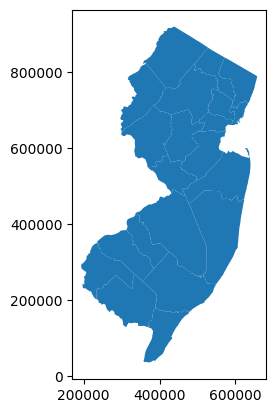

In [ ]:
#make the map
njC0.plot()

In [ ]:
njC0.head()

COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS FIPSSTCO  \
0    ATLANTIC    Atlantic County  ATL    County of Atlantic  882270    34001   
1      BERGEN      Bergen County  BER      County of Bergen  882271    34003   
2  BURLINGTON  Burlington County  BUR  County of Burlington  882272    34005   
3      CAMDEN      Camden County  CAM      County of Camden  882273    34007   
4    CAPE MAY    Cape May County  CAP    County of Cape May  882274    34009   

  FIPSCO          ACRES    SQ_MILES  POP2010  ...  POP1990  POP1980  \
0      1  390815.404215  610.649069   274549  ...   275372   204615   
1      3  153490.275182  239.828555   905116  ...   829592   849843   
2      5  525002.683590  820.316693   448734  ...   395066   362542   
3      7  145650.507808  227.578918   513657  ...   532498   471650   
4      9  183126.574240  286.135272    97265  ...    95089    82266   

   POPDEN2010  POPDEN2000  POPDEN1990  POPDEN1980        REGION  \
0         450         414         451         335       COASTAL   
1        3774        3686        3459        3544  NORTHEASTERN   
2         547         516         482         442      SOUTHERN   
3        2257        2236        2340        2073      SOUTHERN   
4         340         358         332         288       COASTAL   

      Shape_Leng    Shape_Area  \
0  650228.153906  1.702385e+10   
1  443326.122021  6.686010e+09   
2  788906.717476  2.286903e+10   
3  495010.034901  6.344511e+09   
4  514564.858771  7.976962e+09   

                                            geometry  
0  POLYGON ((443056.01 311529.77, 443068.44 31152...  
1  POLYGON ((656200.963 783614.366, 656141.127 78...  
2  POLYGON ((436626.69 491361.78, 436701.19 49135...  
3  POLYGON ((342763.99 423475.83, 342804.1 423429...  
4  POLYGON ((390389.73 177065.13, 390410.17 17705...  

[5 rows x 21 columns]

In [ ]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

In [ ]:
NJ_pov.dtypes

GEOID_DESCRIPTION     object
COUNTY                object
GEOID_NAME            object
SITSINSTATE           object
GEOID                  int32
GEOID_FORMATTED        int32
PPOV                 float32
TIMEFRAME             object
GEOVINTAGE             int16
SOURCE                object
LOCATION              object
dtype: object

In [ ]:
qua_lf.dtypes


COUNTY                           object
PhysicallyUnhealthyDaysperMo    float64
MentallyUnhealthyDaysperMont    float64
dtype: object

In [ ]:
NJ_pov.head(2)

GEOID_DESCRIPTION    COUNTY GEOID_NAME SITSINSTATE  GEOID  GEOID_FORMATTED  \
0            County  ATLANTIC   Atlantic          NJ  34001            34001   
1            County    BERGEN     Bergen          NJ  34003            34003   

    PPOV  TIMEFRAME  GEOVINTAGE  SOURCE            LOCATION  
0  13.03  2018-2022        2022  Census  New Jersey (State)  
1   6.77  2018-2022        2022  Census  New Jersey (State)

In [ ]:
qua_lf.head(2)

COUNTY  PhysicallyUnhealthyDaysperMo  MentallyUnhealthyDaysperMont
0  ATLANTIC                          4.41                          4.42
1    BERGEN                          3.14                          3.42

In [ ]:
nj_qualf = pd.merge(njC0, qua_lf, on='COUNTY',how='outer',indicator=True)

In [ ]:
nj_pov = pd.merge(njC0, NJ_pov, on='COUNTY', how='outer', indicator='merge_status')


In [ ]:
nj_qualf.head(24)

COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS FIPSSTCO  \
0     ATLANTIC    Atlantic County  ATL    County of Atlantic  882270    34001   
1       BERGEN      Bergen County  BER      County of Bergen  882271    34003   
2   BURLINGTON  Burlington County  BUR  County of Burlington  882272    34005   
3       CAMDEN      Camden County  CAM      County of Camden  882273    34007   
4     CAPE MAY    Cape May County  CAP    County of Cape May  882274    34009   
5   CUMBERLAND  Cumberland County  CUM  County of Cumberland  882275    34011   
6        ESSEX       Essex County  ESS       County of Essex  882276    34013   
7   GLOUCESTER  Gloucester County  GLO  County of Gloucester  882277    34015   
8       HUDSON      Hudson County  HUD      County of Hudson  882278    34017   
9    HUNTERDON   Hunterdon County  HUN   County of Hunterdon  882228    34019   
10      MERCER      Mercer County  MER      County of Mercer  882229    34021   
11   MIDDLESEX   Middlesex County  MID   County of Middlesex  882230    34023   
12    MONMOUTH    Monmouth County  MON    County of Monmouth  882910    34025   
13      MORRIS      Morris County  MOR      County of Morris  882231    34027   
14       OCEAN       Ocean County  OCE       County of Ocean  882279    34029   
15     PASSAIC     Passaic County  PAS     County of Passaic  882232    34031   
16       SALEM       Salem County  SAL       County of Salem  882233    34033   
17    SOMERSET    Somerset County  SOM    County of Somerset  882234    34035   
18      SUSSEX      Sussex County  SUS      County of Sussex  882236    34037   
19       UNION       Union County  UNI       County of Union  882235    34039   
20      WARREN      Warren County  WAR      County of Warren  882237    34041   

   FIPSCO          ACRES    SQ_MILES  POP2010  ...  POPDEN2000  POPDEN1990  \
0       1  390815.404215  610.649069   274549  ...         414         451   
1       3  153490.275182  239.828555   905116  ...        3686        3459   
2       5  525002.683590  820.316693   448734  ...         516         482   
3       7  145650.507808  227.578918   513657  ...        2236        2340   
4       9  183126.574240  286.135272    97265  ...         358         332   
5      11  321150.321572  501.797378   156898  ...         292         275   
6      13   83034.859489  129.741968   783969  ...        6118        5768   
7      15  215166.893094  336.198271   288288  ...         758         684   
8      17   32982.400794   51.535001   634266  ...       11817       10733   
9      19  279885.206384  437.320635   128349  ...         279         246   
10     21  146431.864374  228.799788   366513  ...        1533        1424   
11     23  202859.561527  316.968065   809858  ...        2367        2119   
12     25  310834.264884  485.678539   630380  ...        1267        1314   
13     27  308084.429543  481.381921   492276  ...         977         875   
14     29  485078.440831  757.935064   576567  ...         674         585   
15     31  126926.846048  198.323197   501226  ...        2466        2284   
16     33  222158.656047  347.122900    66083  ...         185         188   
17     35  195127.363184  304.886505   323444  ...         976         788   
18     37  342730.853674  535.516959   149265  ...         269         260   
19     39   67438.592595  105.372801   536499  ...        4959        4686   
20     41  232061.359022  362.595874   108692  ...         283         253   

    POPDEN1980        REGION     Shape_Leng    Shape_Area  \
0          335       COASTAL  650228.153906  1.702385e+10   
1         3544  NORTHEASTERN  443326.122021  6.686010e+09   
2          442      SOUTHERN  788906.717476  2.286903e+10   
3         2073      SOUTHERN  495010.034901  6.344511e+09   
4          288       COASTAL  514564.858771  7.976962e+09   
5          265      SOUTHERN  704221.618565  1.398925e+10   
6         6556  NORTHEASTERN  344556.557700  3.616984e+09   
7          595      

Cutting data set code

In [ ]:
#camden_county = nj_qualf[nj_qualf['COUNTY'].str.lower() == 'CAMDEN']

In [ ]:
nj_pov.head(24)

COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS FIPSSTCO  \
0     ATLANTIC    Atlantic County  ATL    County of Atlantic  882270    34001   
1       BERGEN      Bergen County  BER      County of Bergen  882271    34003   
2   BURLINGTON  Burlington County  BUR  County of Burlington  882272    34005   
3       CAMDEN      Camden County  CAM      County of Camden  882273    34007   
4     CAPE MAY    Cape May County  CAP    County of Cape May  882274    34009   
5   CUMBERLAND  Cumberland County  CUM  County of Cumberland  882275    34011   
6        ESSEX       Essex County  ESS       County of Essex  882276    34013   
7   GLOUCESTER  Gloucester County  GLO  County of Gloucester  882277    34015   
8       HUDSON      Hudson County  HUD      County of Hudson  882278    34017   
9    HUNTERDON   Hunterdon County  HUN   County of Hunterdon  882228    34019   
10      MERCER      Mercer County  MER      County of Mercer  882229    34021   
11   MIDDLESEX   Middlesex County  MID   County of Middlesex  882230    34023   
12    MONMOUTH    Monmouth County  MON    County of Monmouth  882910    34025   
13      MORRIS      Morris County  MOR      County of Morris  882231    34027   
14       OCEAN       Ocean County  OCE       County of Ocean  882279    34029   
15     PASSAIC     Passaic County  PAS     County of Passaic  882232    34031   
16       SALEM       Salem County  SAL       County of Salem  882233    34033   
17    SOMERSET    Somerset County  SOM    County of Somerset  882234    34035   
18      SUSSEX      Sussex County  SUS      County of Sussex  882236    34037   
19       UNION       Union County  UNI       County of Union  882235    34039   
20      WARREN      Warren County  WAR      County of Warren  882237    34041   

   FIPSCO          ACRES    SQ_MILES  POP2010  ...  GEOID_NAME  SITSINSTATE  \
0       1  390815.404215  610.649069   274549  ...    Atlantic           NJ   
1       3  153490.275182  239.828555   905116  ...      Bergen           NJ   
2       5  525002.683590  820.316693   448734  ...  Burlington           NJ   
3       7  145650.507808  227.578918   513657  ...      Camden           NJ   
4       9  183126.574240  286.135272    97265  ...    Cape May           NJ   
5      11  321150.321572  501.797378   156898  ...  Cumberland           NJ   
6      13   83034.859489  129.741968   783969  ...       Essex           NJ   
7      15  215166.893094  336.198271   288288  ...  Gloucester           NJ   
8      17   32982.400794   51.535001   634266  ...      Hudson           NJ   
9      19  279885.206384  437.320635   128349  ...   Hunterdon           NJ   
10     21  146431.864374  228.799788   366513  ...      Mercer           NJ   
11     23  202859.561527  316.968065   809858  ...   Middlesex           NJ   
12     25  310834.264884  485.678539   630380  ...    Monmouth           NJ   
13     27  308084.429543  481.381921   492276  ...      Morris           NJ   
14     29  485078.440831  757.935064   576567  ...       Ocean           NJ   
15     31  126926.846048  198.323197   501226  ...     Passaic           NJ   
16     33  222158.656047  347.122900    66083  ...       Salem           NJ   
17     35  195127.363184  304.886505   323444  ...    Somerset           NJ   
18     37  342730.853674  535.516959   149265  ...      Sussex           NJ   
19     39   67438.592595  105.372801   536499  ...       Union           NJ   
20     41  232061.359022  362.595874   108692  ...      Warren           NJ   

    GEOID  GEOID_FORMATTED   PPOV  TIMEFRAME  GEOVINTAGE  SOURCE  \
0   34001            34001  13.03  2018-2022        2022  Census   
1   34003            34003   6.77  2018-2022        2022  Census   
2   34005            34005   6.58  2018-2022        2022  Census   
3   34007            34007  12.41  2018-2022        2022  Census   
4   34009            34009   8.96  2018-2022        2022  Census   
5   34011            34011  15.52  2018-2022        2022  Census   
6   34013 

In [ ]:
nj_qualf1 = pd.merge(njC0, qua_lf, on='COUNTY',how='inner',indicator=False)

In [ ]:
nj_pov1 = pd.merge(njC0, NJ_pov, on='COUNTY',how='inner',indicator=False)

<Axes: >

[]

[]

Text(0.5, 95.84471590140998, 'source/definition: Social Explorer - Health Data 2020 Release')

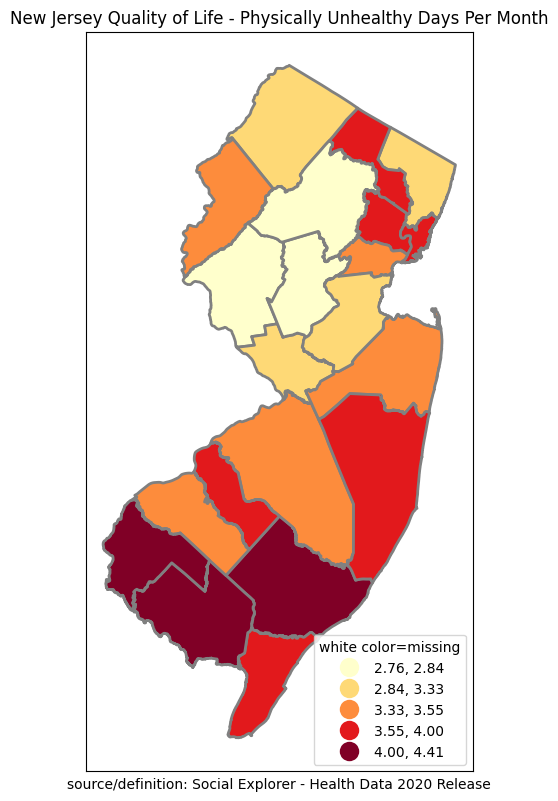

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,10))
nj_qualf1.plot(ax=ax,column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Social Explorer - Health Data 2020 Release''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

New Jersey Counties showing Physically unhealthy days per month.

<Axes: >

[]

[]

Text(0.5, 120.86921463724754, 'source/definition: Social Explorer - Health Data 2020 Release')

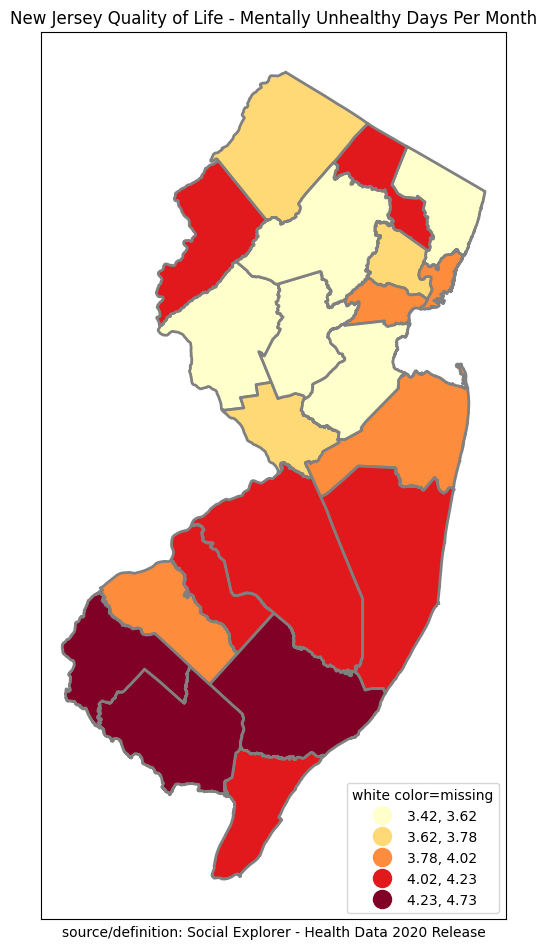

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,12))
nj_qualf1.plot(ax=ax,column='MentallyUnhealthyDaysperMont',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Social Explorer - Health Data 2020 Release''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

Output: New Jersey counties showing mentally unstable days per month.

Findings:

The mapped data revealed a notably higher concentration of both physically and mentally unhealthy days in South Jersey compared to other regions of the state. This phenomenon prompts a closer examination of the underlying factors that might contribute to these health disparities.

To ascertain more trends : E.g Poverty (New Jersey Average Percent of all People that are Living in Poverty as of 2018-2022)

To get a more defined map, county names were included.

In [ ]:
print(nj_pov.columns)


Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry', 'GEOID_DESCRIPTION',
       'GEOID_NAME', 'SITSINSTATE', 'GEOID', 'GEOID_FORMATTED', 'PPOV',
       'TIMEFRAME', 'GEOVINTAGE', 'SOURCE', 'LOCATION', 'merge_status'],
      dtype='object')


In [ ]:
nj_pov = nj_pov.set_geometry('geometry')



<Axes: >

[]

[]

Text(0.5, 120.86921463724754, 'source/definition: Census')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

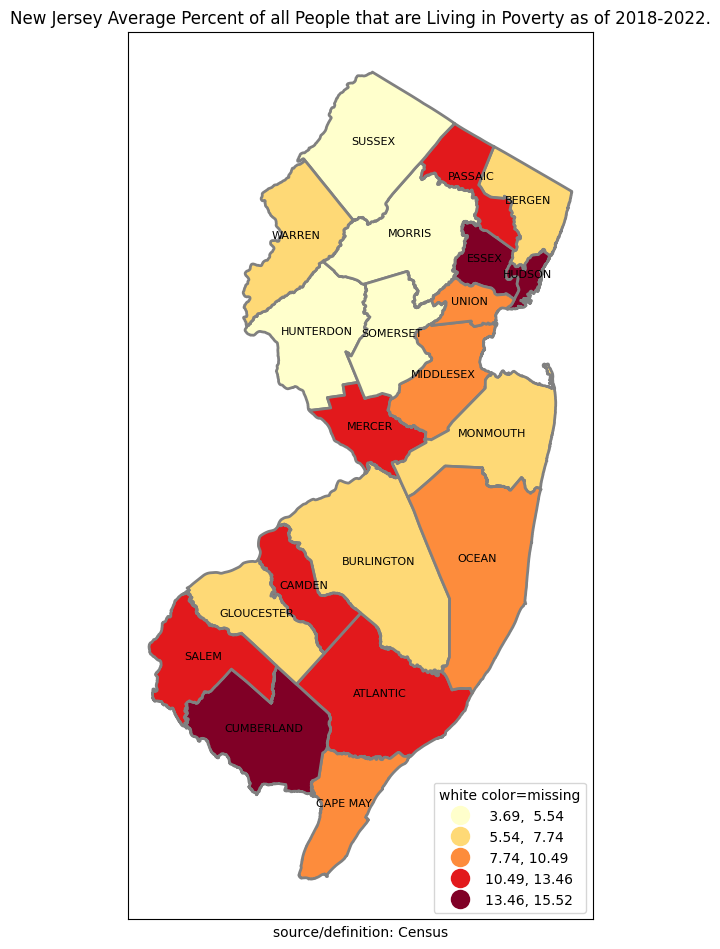

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 12))
nj_pov.plot(ax=ax, column='PPOV', legend=True, cmap='YlOrRd',
            scheme='natural_breaks', k=5, edgecolor='grey', linewidth=2,
            legend_kwds={"fmt": "{:,.2f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax.get_legend()
leg1.set_title('white color=missing')
ax.title.set_text("New Jersey Average Percent of all People that are Living in Poverty as of 2018-2022.")
ax.set_xticks([])  # removes x ticks
ax.set_yticks([])  # removes y ticks
ax.set_xlabel('source/definition: Census')

for _, row in nj_pov.iterrows():
    # Calculate the centroid of the geometry for placing labels
    centroid = row['geometry'].centroid
    # Annotate the county name at the centroid
    ax.annotate(row['COUNTY'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', fontsize=8)


Output: Counties names to better understand trends.

Findings

Socioeconomic Factors:

South Jersey has historically faced various economic challenges compared to its northern counterpart. Factors such as higher rates of unemployment, lower income levels, and limited access to healthcare services can contribute to worse health outcomes. These socioeconomic disparities could explain the higher number of unhealthy


Demographic Considerations:

Differences in population density, age distribution, and racial and ethnic makeup can also influence health metrics. For instance, areas with older populations or higher proportions of minority groups who have faced systemic healthcare barriers might report more unhealthy days.

To corroborate with this findings, Thompson et al. (2021) in their research in the Journal of Public Health observed similar patterns where regions with lower socioeconomic indices suffered disproportionately during health crises, validating the socioeconomic interpretations made here.


PS2



In [ ]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

In [ ]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

 Load the CSV file

In [ ]:
np_location = pd.read_csv('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NPlocation.csv')

In [ ]:
np_location.head(15)

EIN                                  Organization Name  \
0          ein                                  organization_name   
1   01-0554061        Mount Ephraim Senior Housing Initiative Inc   
2   01-0801820         Camden County Partnership for Children Inc   
3   02-0650756  Urban Promise Ministries Community Development...   
4   02-0660903         Allied Resources for Children Incorporated   
5   04-3769403                        Stacy Zallie Foundation Inc   
6   06-1024058          American Society of Perianesthesia Nurses   
7   11-3786401                                   Village Wrap Inc   
8   13-2640040                                          Asgpp Inc   
9   13-4205636                      Family Health Initiatives Inc   
10  13-6096832                       Alice Rich Northrop Memorial   
11  14-1859173                                   Arvf Corporation   
12  14-1918450         Tower of Hope International Ministries Inc   
13  20-0090179                           Runnemede Industries Inc   
14  20-0468802  Nehemiah Project Community Development Corpora...   

                          Address             City       State       Zip  \
0                         address             city  state_code  zip_code   
1                  587 Haddon Ave     COLLINGSWOOD          NJ      8108   
2           221 Laurel Rd Ste 300         VOORHEES          NJ      8043   
3              2 N FORKLANDING RD      MAPLE SHADE          NJ      8052   
4                879 BEIDEMAN AVE           CAMDEN          NJ      8105   
5     1230 Blackwood Clementon Rd        CLEMENTON          NJ      8021   
6                  90 Frontage Rd      CHERRY HILL          NJ      8034   
7                  316 Haddon Ave     COLLINGSWOOD          NJ      8108   
8                     PO Box 1654    MERCHANTVILLE          NJ      8109   
9      2500 McClellan Ave Ste 250       PENNSAUKEN          NJ      8109   
10  100 Lindis Farne Ave Apt 1308  HADDON TOWNSHIP          NJ      8108   
11         2115 Voorhees Town Ctr         VOORHEES          NJ      8043   
12                     PO Box 148       PENNSAUKEN          NJ      8110   
13                 1940 Olney Ave      CHERRY HILL          NJ      8003   
14                    PO Box 2031           CAMDEN          NJ      8101   

   Total Revenue - Current Year Total Functional Expenses  \
0                       tot_rev                   tot_exp   
1                        635333                    786832   
2                      17210381                  13841547   
3                        706354                    617543   
4                        329853                    136385   
5                         90903                     51100   
6                       3496191                   2481404   
7                        285182                    250496   
8                        106178                     87609   
9                       3659074                   3733670   
10                        55464                     26443   
11                       324900                    327759   
12                        46115                     40750   
13                       926469                    896278   
14                         3528                         0   

   Total Liabilities: End of Year Total Assets: End of Year  \
0                        tot_liab                tot_assets   
1                         7006834                   4208983   
2                          922543                   8510476   
3                            8623                    262795   
4                           23054                    284844   
5                               0                    161162   
6                          775318                   7337515   
7                               0                     36374   
8                               0                    154196   
9                         1113091                   1556413   
10                 

In [ ]:
np_location.dtypes

EIN                                                       object
Organization Name                                         object
Address                                                   object
City                                                      object
State                                                     object
Zip                                                       object
Total Revenue - Current Year                              object
Total Functional Expenses                                 object
Total Liabilities: End of Year                            object
Total Assets: End of Year                                 object
Number of Employees Reported on Form W-3                  object
Net Assets                                                object
National Taxonomy of Exempt Entities Short Description    object
Type of 990 Form Filed                                    object
Fiscal Year End                                           object
National Taxonomy of Exempt Entities Full Description     object
Point Source                                              object
Selected Location                                         object
dtype: object

In [ ]:
print(np_location.columns)

Index(['EIN', 'Organization Name', 'Address', 'City', 'State', 'Zip',
       'Total Revenue - Current Year', 'Total Functional Expenses',
       'Total Liabilities: End of Year', 'Total Assets: End of Year',
       'Number of Employees Reported on Form W-3', 'Net Assets',
       'National Taxonomy of Exempt Entities Short Description',
       'Type of 990 Form Filed', 'Fiscal Year End',
       'National Taxonomy of Exempt Entities Full Description', 'Point Source',
       'Selected Location'],
      dtype='object')


#PS2

This study further explored one of the key socio-economic factors that was highlighted, which is the unemployment rate in New Jersey. This study examined the relationship between the unemployment rate and quality of life in New Jersey with a closer look at mentally unhealthy days per month and physically unhealthy days per month. It is worth noting that even after the pandemic, many counties in New Jersey are yet to recover from the pandemic era.




loading the CSV file for unemployment rate trends in New Jersey Counties with emphasis on post pandemic


In [ ]:
NJ_umploy = pd.read_csv('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/policy%20map_unemployment%20change%20rate%20_2020_23.csv', skiprows=1)

In [ ]:
print(NJ_umploy.columns)

Index(['COUNTY', 'cp3_unemprate'], dtype='object')


In [ ]:
NJ_umploy.head()

COUNTY  cp3_unemprate
0   34001          -11.2
1   34003           -5.3
2   34005           -4.0
3   34007           -4.9
4   34009           -6.1

In [ ]:
NJ_umploy

COUNTY  cp3_unemprate
0    34001          -11.2
1    34003           -5.3
2    34005           -4.0
3    34007           -4.9
4    34009           -6.1
5    34011           -3.9
6    34013           -5.7
7    34015           -4.6
8    34017           -5.8
9    34019           -3.4
10   34021           -3.3
11   34023           -4.4
12   34025           -4.7
13   34027           -3.8
14   34029           -4.9
15   34031           -6.6
16   34033           -3.7
17   34035           -3.7
18   34037           -4.7
19   34039           -4.8
20   34041           -4.2

In [ ]:
print(njC0.columns)
print(NJ_umploy.columns)

Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')
Index(['COUNTY', 'cp3_unemprate'], dtype='object')


In [ ]:
print(njC0['FIPSSTCO'].dtype)
print(NJ_umploy['COUNTY'].dtype)

object
int64


In [ ]:
njC0['FIPSSTCO'] = njC0['FIPSSTCO'].astype(str)
NJ_umploy['COUNTY'] = NJ_umploy['COUNTY'].astype(str)

MERGING THE NEW VARIABLE : this variable contains information on the unemployment rate in counties in New jersey.

In [ ]:
nj_umploy = pd.merge(njC0, NJ_umploy, left_on='FIPSSTCO', right_on='COUNTY', how='outer', indicator='merge_status')

Output for better visualization of this trends

In [ ]:
     legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Unemployment rate change between 2020-2023")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Policy map - BLS''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inchesfig, ax = plt.subplots(1, figsize=(4,6))
nj_umploy.plot(ax=ax,column='cp3_unemprate',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
     =0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

SyntaxError: unmatched ')' (<ipython-input-44-daa86ce7dcac>, line 1)

TRENDS: Counties in dark red have experienced the most minor decrease in unemployment rates (between -4.20% and -3.30%). This suggests that these countries faced more significant economic challenges in reducing unemployment post-pandemic.

Counties with lighter red and orange colors saw more substantial improvements in unemployment (between -11.20% and -4.20%).

looking at the economic structure in New Jersey Northern counties, being more urbanized, likely benefited from industries that transitioned to remote work or reopened more quickly, such as finance, tech, and healthcare.

<Axes: >

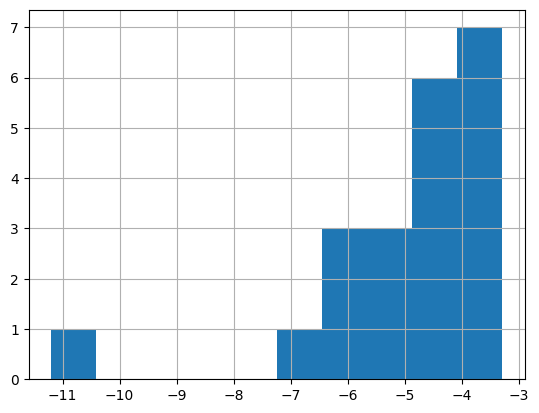

In [ ]:
#do think how distribution translate into colors!!
nj_umploy.cp3_unemprate.hist() #negatively  skewed!

<Axes: >

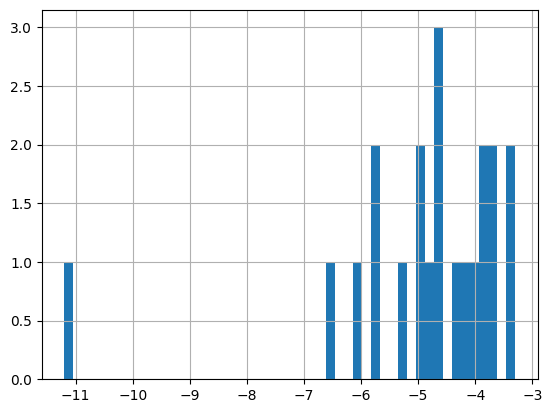

In [ ]:
nj_umploy.cp3_unemprate.hist(bins=50) #see better #negatively skewed and presence of outlier !

<Axes: >

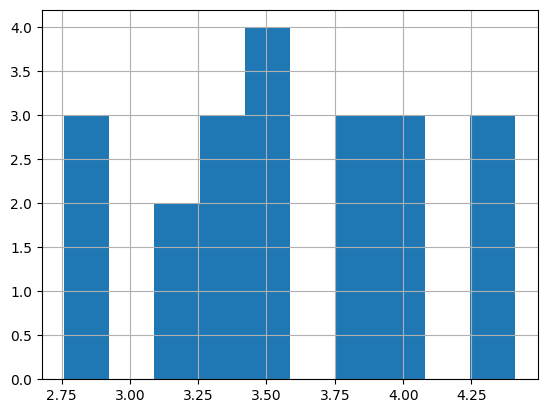

In [ ]:
#do think how distribution translate into colors!!
nj_qualf1.PhysicallyUnhealthyDaysperMo.hist() #minimal skewed!

<Axes: >

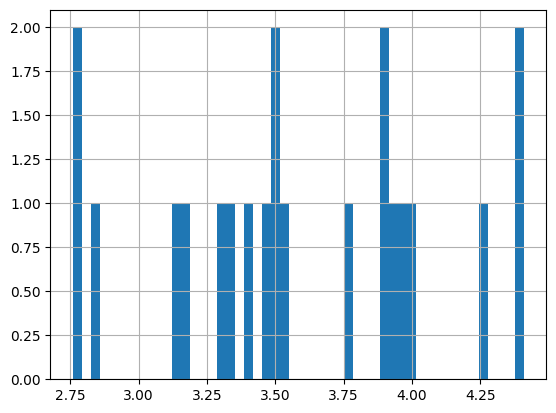

In [ ]:
nj_qualf1.PhysicallyUnhealthyDaysperMo.hist(bins=50) #see better ; Minimal or No Skew: The distribution does not show a strong left or right skew.

<Axes: >

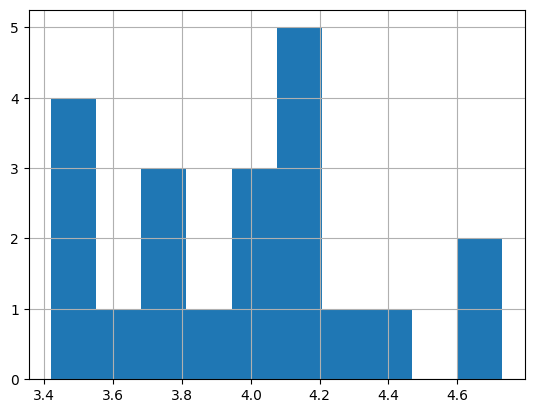

In [ ]:
#do think how distribution translate into colors!!
nj_qualf1.MentallyUnhealthyDaysperMont.hist() #skewed to the right!

<Axes: >

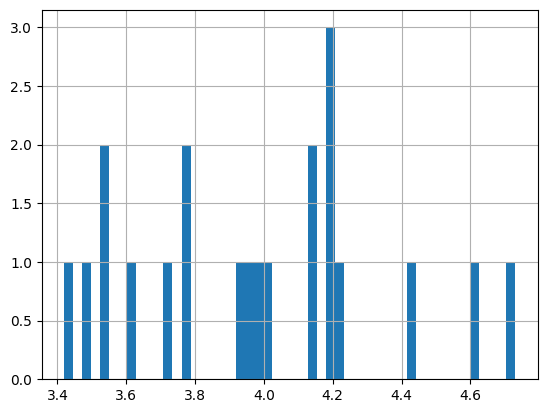

In [ ]:
nj_qualf1.MentallyUnhealthyDaysperMont.hist(bins=50) #see better ; skewed to the right

<Axes: >

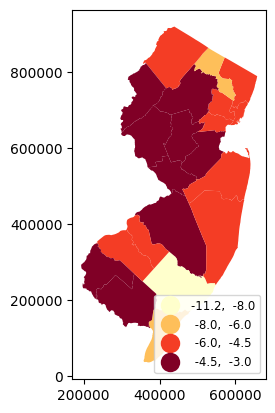

In [ ]:
#your own classification: 2k looks like good cutoff, then 4k and 7k
nj_umploy.plot(column="cp3_unemprate", scheme="user_defined", cmap="YlOrRd", classification_kwds={'bins':[-8, -6, -4.5, -3]},
         linewidth=0, legend=True,legend_kwds= {"fmt": "{:,.1f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})


<Axes: >

[]

[]

<Axes: >

[]

[]

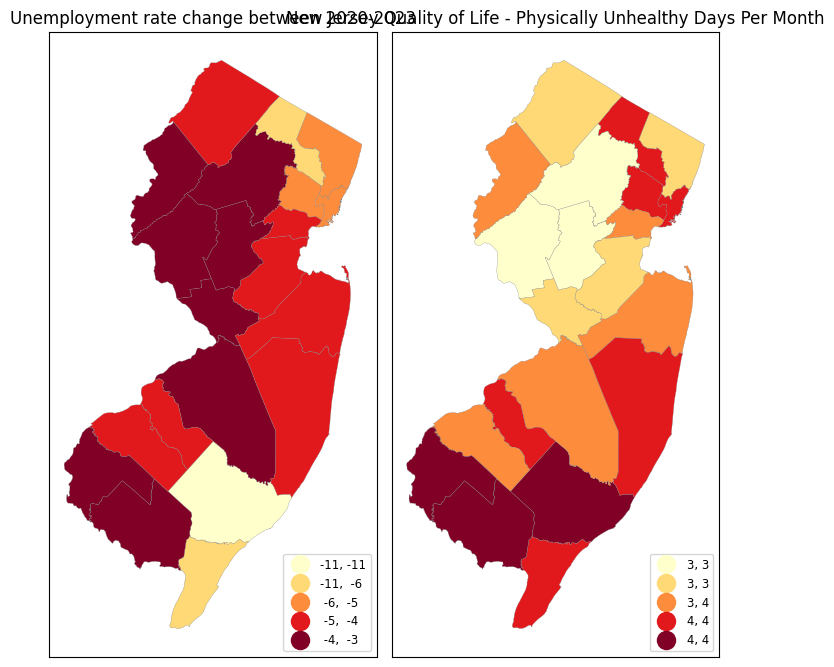

In [ ]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])

<Axes: >

[]

[]

<Axes: >

[]

[]

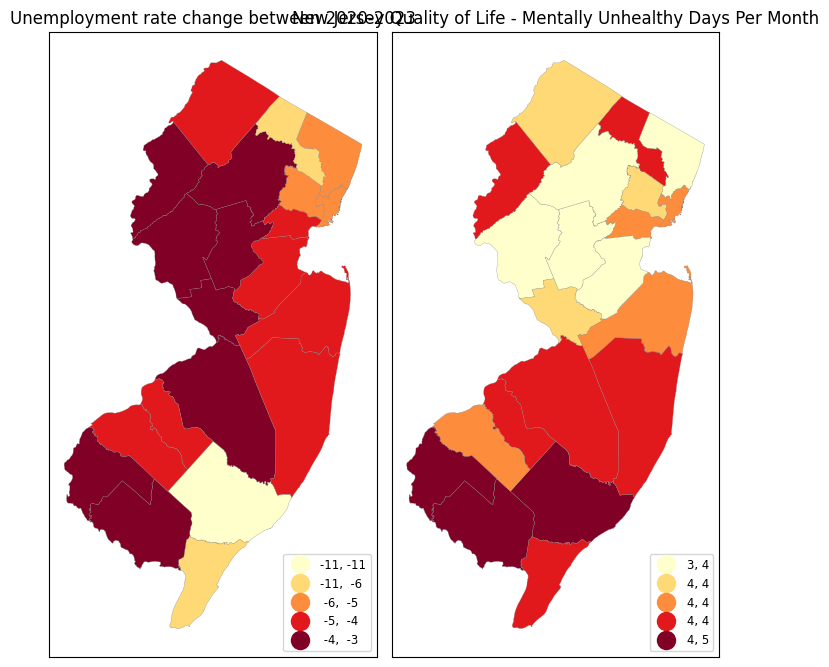

In [ ]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='MentallyUnhealthyDaysperMont',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])

In [ ]:
print(nj_qualf1.columns)  # Check column names in nj_qualf1

Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry', 'PhysicallyUnhealthyDaysperMo',
       'MentallyUnhealthyDaysperMont'],
      dtype='object')


In [ ]:
print(nj_umploy.columns)  # Check column names in nj_umploy

Index(['COUNTY_x', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO',
       'FIPSCO', 'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990',
       'POP1980', 'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980',
       'REGION', 'Shape_Leng', 'Shape_Area', 'geometry', 'COUNTY_y',
       'cp3_unemprate', 'merge_status'],
      dtype='object')


<Axes: >

[]

[]

<Axes: >

[]

[]

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

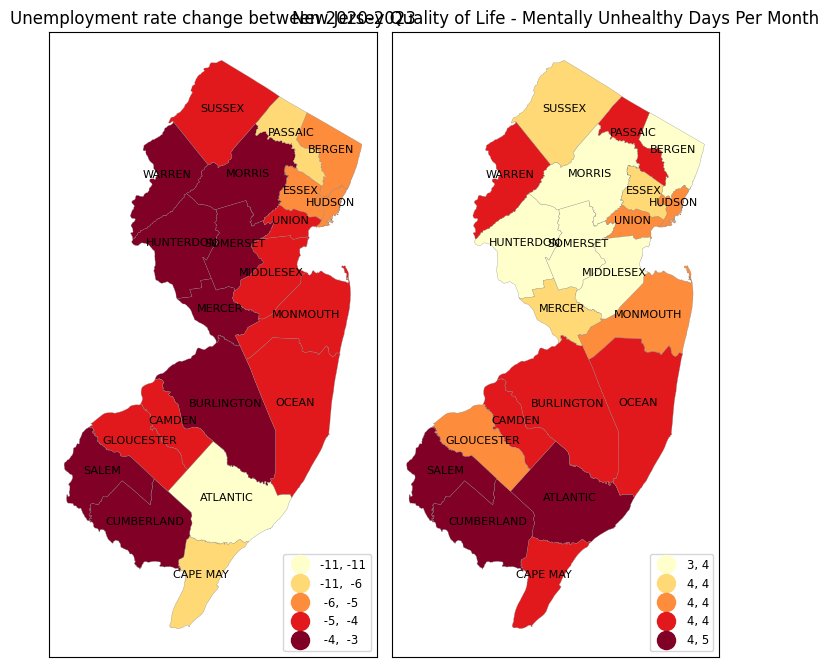

In [ ]:


# Create side-by-side subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(7, 7), sharey=True, tight_layout=True)

# Plot unemployment rate on the first subplot
nj_umploy.plot(ax=axs[0], column='cp3_unemprate', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
               edgecolor='grey', linewidth=0.2,
               legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                            'fontsize': 'small', 'markerscale': 1.4})
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_yticks([])  # Remove y-axis ticks

# Plot quality of life (Physically Unhealthy Days) on the second subplot
nj_qualf1.plot(ax=axs[1], column='MentallyUnhealthyDaysperMont', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
               edgecolor='grey', linewidth=0.2,
               legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                            'fontsize': 'small', 'markerscale': 1.4})
axs[1].title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].set_yticks([])  # Remove y-axis ticks

# Annotate the county names in the first plot (unemployment)
for _, row in nj_umploy.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[0].annotate(row['COUNTY_x'], xy=(centroid.x, centroid.y),  # Use axs[0] for the unemployment plot
                    horizontalalignment='center', fontsize=8)

# Optional: Annotate county names in the second plot (quality of life)
for _, row in nj_qualf1.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[1].annotate(row['COUNTY'], xy=(centroid.x, centroid.y),  # Use axs[1] for the quality of life plot
                    horizontalalignment='center', fontsize=8)

# Show the plot
#plt.show()


<Axes: >

[]

[]

<Axes: >

[]

[]

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

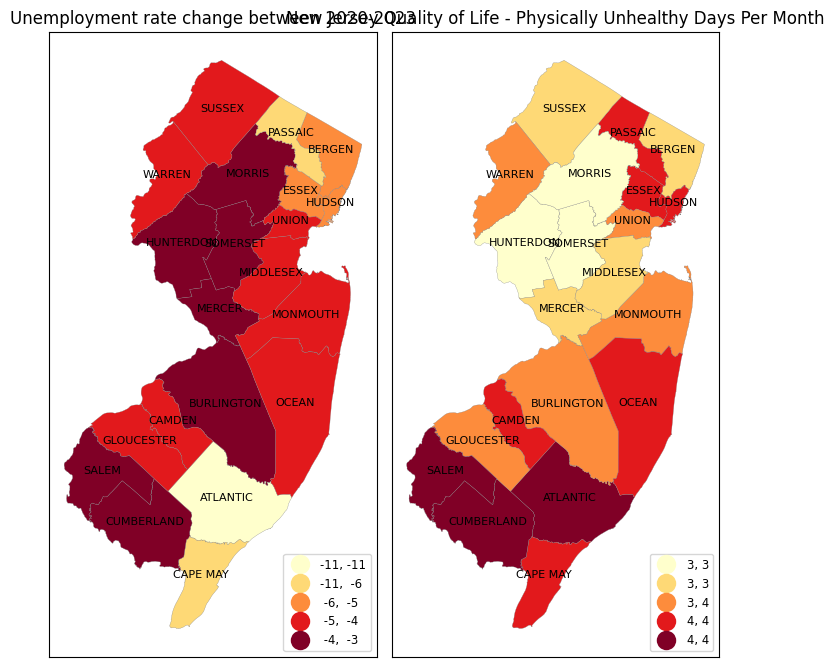

In [ ]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])


# Annotate the county names in the first plot (unemployment)
for _, row in nj_umploy.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[0].annotate(row['COUNTY_x'], xy=(centroid.x, centroid.y),  # Use axs[0] for the unemployment plot
                    horizontalalignment='center', fontsize=8)

# Optional: Annotate county names in the second plot (quality of life)
for _, row in nj_qualf1.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[1].annotate(row['COUNTY'], xy=(centroid.x, centroid.y),  # Use axs[1] for the quality of life plot
                    horizontalalignment='center', fontsize=8)



Two choropleth maps of New Jersey, each illustrating different data trends across counties:

TRENDS:

Counties such as Cumberland, Salem, Camden, Gloucester, and Atlantic are shaded in dark red, indicating the most considerable unemployment rate decreases (ranging from -11.2% to -6.1%).
These southern counties have experienced substantial reductions in unemployment, suggesting that they have seen economic improvements or recovery after higher unemployment.

It is worth noting that Counties with more significant decreases in unemployment (such as Cumberland, Salem, and Atlantic) may have experienced improvements in economic stability, access to jobs, and overall well-being after the pandemic. This could contribute to a better quality of life, as more employment opportunities often lead to improved health outcomes, mental well-being, and reduced stress.
Interestingly, this is in contrast with the report by NJBIA (2024),  that “despite an acceleration in hiring, New Jersey’s unemployment rate rose 0.1 percentage point to 4.8% in December, finishing out the year 1.5 percentage points higher than the jobless rate was at the end of 2022, state labor officials said Thursday” ((NJBIA, 2024).

 From another standpoint, this might be peculiar to counties, not all counties in New Jersey, after the point to factor in. Buttressing this, the output showed a difference in the unemployment change rate, not just a uniform trend in all counties.

Regional Disparities:

 Northern counties, while not showing the same dramatic drop in unemployment, tend to report fewer mentally unhealthy days. This could be due to better healthcare infrastructure, less economic distress, or other socio-economic factors contributing to overall well-being.

There seems to be a higher incidence of physically unhealthy days in the southern counties, which might correlate with other socio-economic factors, including access to healthcare, lifestyle, and economic conditions.



In [ ]:
njP = nj_umploy.copy()

njP["geometry"] = njP["geometry"].centroid

In [ ]:
njP.head(3)



COUNTY_x         COUNTY_LAB   CO             GNIS_NAME    GNIS FIPSSTCO  \
0    ATLANTIC    Atlantic County  ATL    County of Atlantic  882270    34001   
1      BERGEN      Bergen County  BER      County of Bergen  882271    34003   
2  BURLINGTON  Burlington County  BUR  County of Burlington  882272    34005   

  FIPSCO          ACRES    SQ_MILES  POP2010  ...  POPDEN2000  POPDEN1990  \
0      1  390815.404215  610.649069   274549  ...         414         451   
1      3  153490.275182  239.828555   905116  ...        3686        3459   
2      5  525002.683590  820.316693   448734  ...         516         482   

   POPDEN1980        REGION     Shape_Leng    Shape_Area  \
0         335       COASTAL  650228.153906  1.702385e+10   
1        3544  NORTHEASTERN  443326.122021  6.686010e+09   
2         442      SOUTHERN  788906.717476  2.286903e+10   

                        geometry COUNTY_y  cp3_unemprate  merge_status  
0  POINT (446845.671 234718.679)    34001          -11.2          both  
1  POINT (608674.972 775344.901)    34003           -5.3          both  
2    POINT (445015.1 380378.991)    34005           -4.0          both  

[3 rows x 24 columns]

<Axes: >

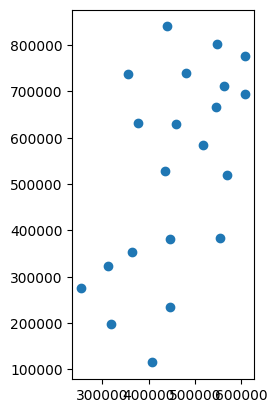

In [ ]:
njP.plot()

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

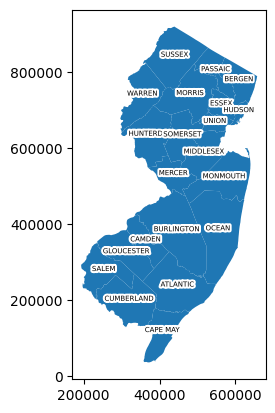

In [ ]:
from matplotlib.patheffects import withStroke
ax=nj_umploy.plot() #https://stackoverflow.com/questions/38899190/geopandas-label-polygons
for x, y, label in zip(njP.geometry.x, njP.geometry.y, njP.COUNTY_x):
    ax.annotate(label, xy=(x, y),horizontalalignment='center',
    fontsize=5,color='black', #fontweight='bold',
    path_effects=[withStroke(linewidth=3, foreground='white')]) #ytext=(3, 3), textcoords="offset points"

Future Research

Future research will examine nonprofits in New Jersey and their contributions to improving the state’s quality of life. Some nonprofit organizations have been part of this recovery process. For instance, Cooper's Ferry Partnership is a community-based organization dedicated to revitalizing Camden. They work on urban redevelopment projects, economic development, and improving the quality of life in Camden's communities.

This study may look into areas of nonprofits and what they intend to offer New Jersey to help curb and improve the quality of life.  Non-profit organizations can be crucial in addressing the socioeconomic challenges highlighted in South Jersey, particularly in improving health outcomes for disadvantaged populations.




LIMITATIONS

Difficulties in understanding the technicalities in sourcing and cleaning useful data.




Reference

NJBIA. (2024, January 18). NJ Unemployment Rate Increases to 4.8%. New Jersey Business & Industry Association. Retrieved from https://njbia.org/nj-unemployment-rate-rises-to-4-8/


In [ ]:
np_location = pd.read_csv('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NPlocation.csv')

In [ ]:
np_location.head(15)

EIN                                  Organization Name  \
0          ein                                  organization_name   
1   01-0554061        Mount Ephraim Senior Housing Initiative Inc   
2   01-0801820         Camden County Partnership for Children Inc   
3   02-0650756  Urban Promise Ministries Community Development...   
4   02-0660903         Allied Resources for Children Incorporated   
5   04-3769403                        Stacy Zallie Foundation Inc   
6   06-1024058          American Society of Perianesthesia Nurses   
7   11-3786401                                   Village Wrap Inc   
8   13-2640040                                          Asgpp Inc   
9   13-4205636                      Family Health Initiatives Inc   
10  13-6096832                       Alice Rich Northrop Memorial   
11  14-1859173                                   Arvf Corporation   
12  14-1918450         Tower of Hope International Ministries Inc   
13  20-0090179                           Runnemede Industries Inc   
14  20-0468802  Nehemiah Project Community Development Corpora...   

                          Address             City       State       Zip  \
0                         address             city  state_code  zip_code   
1                  587 Haddon Ave     COLLINGSWOOD          NJ      8108   
2           221 Laurel Rd Ste 300         VOORHEES          NJ      8043   
3              2 N FORKLANDING RD      MAPLE SHADE          NJ      8052   
4                879 BEIDEMAN AVE           CAMDEN          NJ      8105   
5     1230 Blackwood Clementon Rd        CLEMENTON          NJ      8021   
6                  90 Frontage Rd      CHERRY HILL          NJ      8034   
7                  316 Haddon Ave     COLLINGSWOOD          NJ      8108   
8                     PO Box 1654    MERCHANTVILLE          NJ      8109   
9      2500 McClellan Ave Ste 250       PENNSAUKEN          NJ      8109   
10  100 Lindis Farne Ave Apt 1308  HADDON TOWNSHIP          NJ      8108   
11         2115 Voorhees Town Ctr         VOORHEES          NJ      8043   
12                     PO Box 148       PENNSAUKEN          NJ      8110   
13                 1940 Olney Ave      CHERRY HILL          NJ      8003   
14                    PO Box 2031           CAMDEN          NJ      8101   

   Total Revenue - Current Year Total Functional Expenses  \
0                       tot_rev                   tot_exp   
1                        635333                    786832   
2                      17210381                  13841547   
3                        706354                    617543   
4                        329853                    136385   
5                         90903                     51100   
6                       3496191                   2481404   
7                        285182                    250496   
8                        106178                     87609   
9                       3659074                   3733670   
10                        55464                     26443   
11                       324900                    327759   
12                        46115                     40750   
13                       926469                    896278   
14                         3528                         0   

   Total Liabilities: End of Year Total Assets: End of Year  \
0                        tot_liab                tot_assets   
1                         7006834                   4208983   
2                          922543                   8510476   
3                            8623                    262795   
4                           23054                    284844   
5                               0                    161162   
6                          775318                   7337515   
7                               0                     36374   
8                               0                    154196   
9                         1113091                   1556413   
10                 

In [ ]:
np_location.dtypes

EIN                                                       object
Organization Name                                         object
Address                                                   object
City                                                      object
State                                                     object
Zip                                                       object
Total Revenue - Current Year                              object
Total Functional Expenses                                 object
Total Liabilities: End of Year                            object
Total Assets: End of Year                                 object
Number of Employees Reported on Form W-3                  object
Net Assets                                                object
National Taxonomy of Exempt Entities Short Description    object
Type of 990 Form Filed                                    object
Fiscal Year End                                           object
National Taxonomy of Exempt Entities Full Description     object
Point Source                                              object
Selected Location                                         object
dtype: object

# PS3


 Problem Set 3:

Overview Research Questions

Building on previous analyses of health and economic disparities across New Jersey, Problem Set 3 focuses specifically on Camden County, examining health and quality of life metrics at a finer scale. This analysis seeks to address critical questions about health disparities at the neighborhood level within Camden, highlighting how socioeconomic factors may contribute to observed health outcomes. Camden County has shown some of the highest levels of physically and mentally unhealthy days, making it an ideal case study to explore detailed neighborhood-level trends.

Moving from county-level to neighborhood-level analysis in Camden County is essential for capturing the true diversity of social, economic, and health-related conditions within the county. This approach not only aligns with the critiques of aggregation bias but also enhances the validity of our findings, providing a stronger foundation for targeted public health interventions. By addressing the unique needs of neighborhoods, we can foster more equitable health outcomes and improve quality of life for all residents.

Research Question 1:
How does educational attainment influence quality of life and healthcare access in Camden County?

•	Hypothesis: Census tracts with higher educational attainment (fewer individuals without a high school diploma) have better quality of life, as indicated by higher average family income and lower rates of uninsured individuals.


Research question 2
How do neighborhood-level analyses reveal disparities that may be hidden in county-level data, and what insights can this provide for addressing health and economic inequalities?

•	Hypothesis: Neighborhood-level data will reveal significant socioeconomic and health disparities within Camden County that are not evident in county-level aggregate data.


Research Question 3
Are there significant disparities in health insurance coverage, particularly among elderly residents, across different neighborhoods in Camden County?


•	Hypothesis: There are significant disparities in health insurance coverage among elderly residents across different neighborhoods in Camden County, with lower-income neighborhoods exhibiting higher rates of uninsured elderly individuals compared to higher-income neighborhoods.


**DESCRIPTION OF VARAIBLES**

Geo_TRACT:CensusTract                                            
Pop_16Plus : Population 16 Years and Over
Labor_16Plus: Population 16 Years and Over: In Labor Force                                 
Employed_16Plus : Population 16 Years and Over: In Labor Force: Civilian: Employed             
Unemployed_16Plus: Population 16 Years and Over: In Labor Force: Civilian: Unemployed           
Not_Labor_16Plus: Population 16 Years and Over: Not in the Labor Force                             
Pop_25Plus:  Population 25 Years and Over:                                                
Less_HS_25Plus: Population 25 Years and Over: Less than High School                          
HS_Grads_25Plus : Population 25 Years and Over: High School Graduate (Includes Equivalency)    
Some_College_25Plus: Population 25 Years and Over: Some College                                   
Bachelors_25Plus: Population 25 Years and Over: Bachelor's Degree                              
Masters_25Plus: Population 25 Years and Over: Master's Degree                                
Avg_Fam_Inc: Average Family Income (In 2022 Inflation Adjusted Dollars)                   
Households:Households:                                                                  
Housholds_Public_AssistInc: Households: With Public Assistance Income                                    
Housholds_No_Public_Assist: Households: No Public Assistance Income                                     
Housholds_Retire_Inc: Households: With Retirement Income                                           
Housholds_No_Retir_Inc: Households: No Retirement Income                                             
Total:Total:                                                                      
Total_With_Health_Ins: Total: No Health Insurance Coverage                                          
Total_With_Health_Ins: Total: With Health Insurance Coverage                                        
Pop_25_34: Population 25 to 34:                                                         
Pop_25_34_With_Health_Ins: Population 25 to 34: No Health Insurance Coverage                            
Pop_25_34_With_Health_Ins: Population 25 to 34: With Health Insurance Coverage                          
Pop_65Plus: Population 65 or Older:                                                      
Pop_65Plus_No_Health_Ins: Population 65 or Older: No Health Insurance Coverage                         
Pop_65Plus_With_Health_Ins: Population 65 or Older: With Health Insurance Coverage           

Unit of Analysis: Census tract


 ** Focus on Camden County **

Motivation for Camden County Focus
Camden County was chosen as a focal point for several reasons:

1.	Camden County was chosen to mitigate the limitations of county-level aggregation, which often risks generalizing findings across diverse neighborhoods, a phenomenon known as the ecological fallacy. Prior research (Robinson, 1950; Jargowsky, 1997) has shown that aggregate data can mask real, localized trends and lead to misleading conclusions. By focusing on Camden neighborhoods, we can achieve a more accurate understanding of social, economic and health disparities and develop targeted


2.	Need for Detailed Analysis: Aggregate data at the county level may obscure important neighborhood-level variations, leading to potential ecological fallacies or aggregate bias (Robinson, 1998). By focusing on Camden, the study aims to reveal intra-county disparities that may be overlooked in broader analyses.


3.	Historical Socioeconomic Challenges: Camden has faced long-standing socio-economic and health challenges, making it a representative case for studying health and economic disparities at a more localized level.


Note: Why Aggregation Can Lead to Misleading Conclusions (Aggregation bias)

•	Confounding Variables:
•	Uncontrolled Factors:
•	Left-Out Variable Bias:









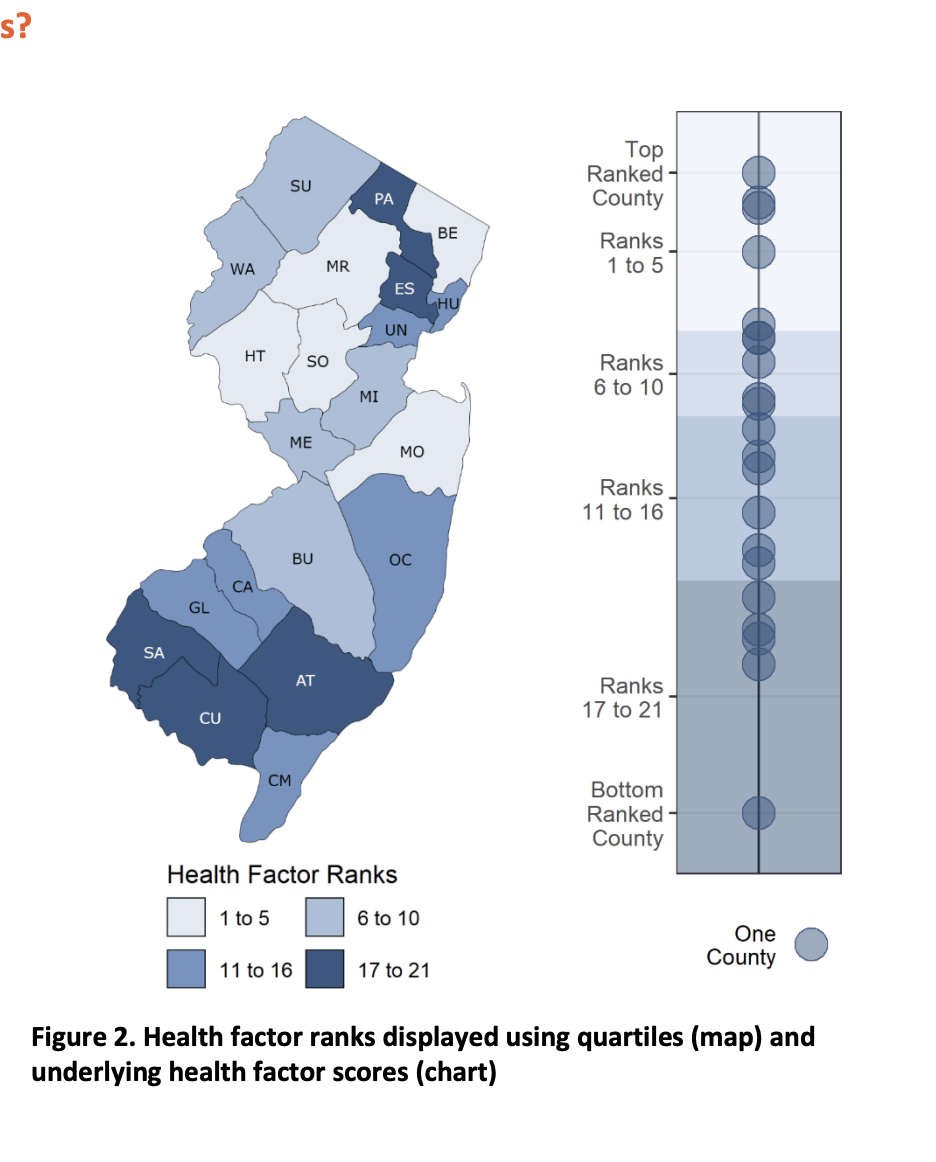



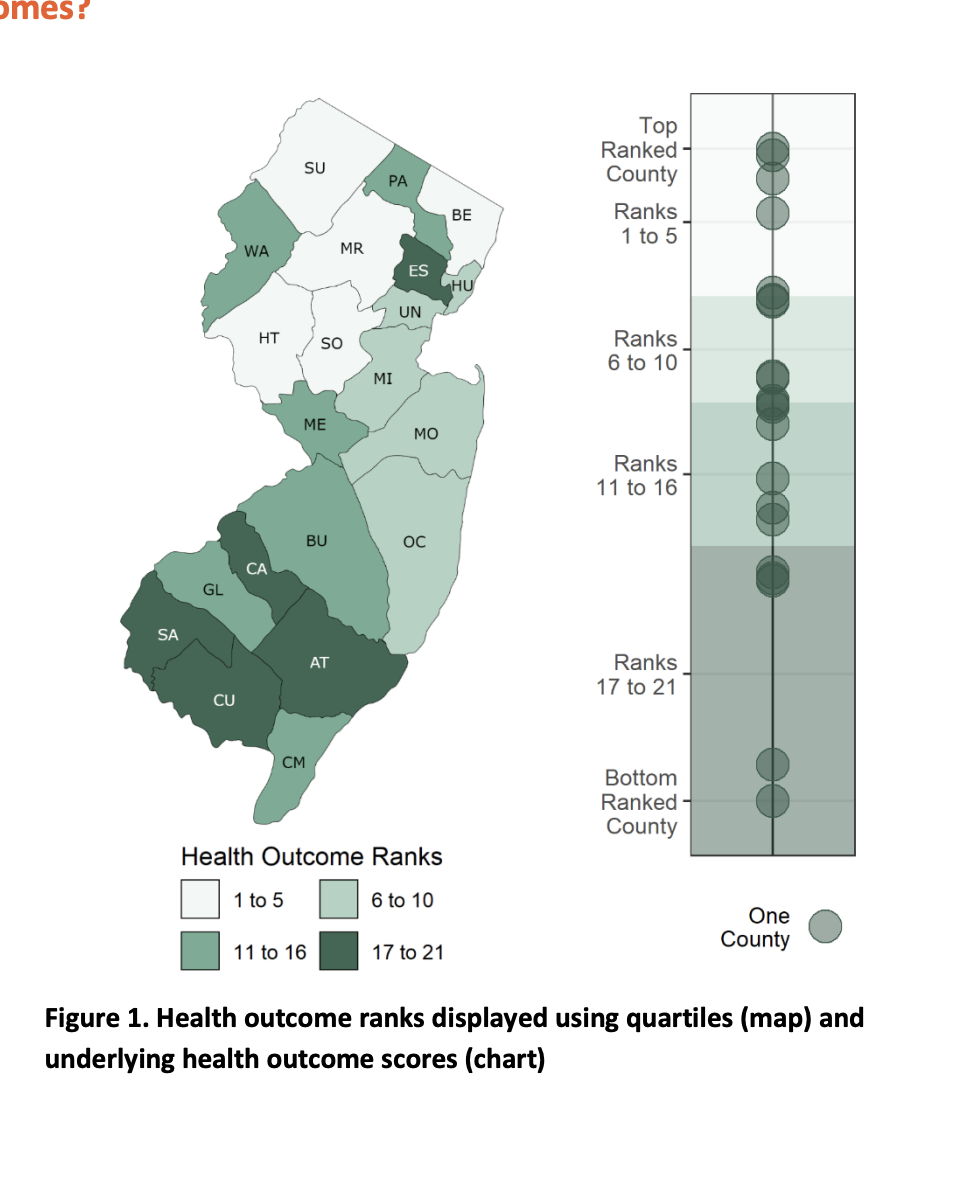










2022 New Jersey County Health Rankings

https://www.countyhealthrankings.org/sites/default/files/media/document/CHR2022_NJ_0.pdf




The green map shows New Jersey’s health outcome rankings by county. The map is divided into four quartiles with less color intensity indicating better health outcomes. Specific county ranks can be found in the table on page 2.



Some of the Selected Variables:
1.	Educational Attainment: This is a fundamental social determinant that strongly influences a person's opportunities, income potential, and overall well-being.

2.	Household with Income Assistance: This variable reflects economic hardship and the need for social safety nets.

3.	Employment Over Years and Above: Employment provides income, social connections, and a sense of purpose, all of which contribute to quality of life. Unemployment or underemployment can negatively impact individuals and communities.


Rationale:

These three variables represent key dimensions of social determinants that have a significant impact on quality of life:
•	Education: Provides a foundation for personal and economic growth.
•	Income Assistance: Addresses basic needs and economic security.
•	Employment: Enables economic participation and social integration.



In [1]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

shapefile

In [4]:
import gdown #aok organize better like move this earlier to imports

Downloading...
From: https://drive.google.com/uc?export=download&id=1bYSXS5tARK7u6iUElpCa6FlxboyKJErb
To: /content/Census_Tracts.zip
100%|██████████| 255k/255k [00:00<00:00, 8.33MB/s]


'Census_Tracts.zip'

<Figure size 1500x1500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Map of Camden Showing Census Tracts')

<Figure size 1500x1500 with 0 Axes>

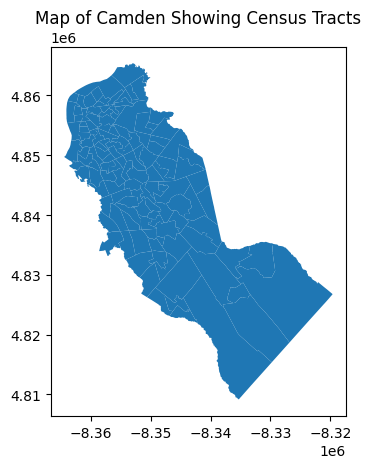

In [5]:
download_url = f'https://drive.google.com/uc?export=download&id=1bYSXS5tARK7u6iUElpCa6FlxboyKJErb'
output_filename = 'Census_Tracts.zip'
gdown.download(download_url, output_filename, quiet=False)

with zipfile.ZipFile(output_filename, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')
wd_map = gpd.read_file('extracted_files/Census_Tracts.shp')

plt.figure(figsize=(15, 15))
wd_map.plot()
plt.title('Map of Camden Showing Census Tracts')
plt.show()

In [7]:
# Print the head of the GeoDataFrame
wd_map.head() #aok cleaner without print statement

OBJECTID STATEFP10 COUNTYFP10 TRACTCE10      GEOID10   NAME10  \
0         1        34        007    607505  34007607505  6075.05   
1         2        34        007    603800  34007603800     6038   
2         3        34        007    603002  34007603002  6030.02   
3         4        34        007    601101  34007601101  6011.01   
4         5        34        007    601200  34007601200     6012   

             NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0  Census Tract 6075.05   G5020          S  6400124    121277  +39.8309199   
1     Census Tract 6038   G5020          S  2164187     80527  +39.9168160   
2  Census Tract 6030.02   G5020          S  1433723         0  +39.9565411   
3  Census Tract 6011.01   G5020          S   740247         0  +39.9486791   
4     Census Tract 6012   G5020          S   805794         0  +39.9445110   

     INTPTLON10                                           geometry  
0  -074.9446096  POLYGON ((-8342957.202 4844363.749, -8342860.2...  
1  -075.0487040  POLYGON ((-8356321.001 4855147.889, -8356321.4...  
2  -075.0626327  POLYGON ((-8357142.984 4858644.378, -8357168.3...  
3  -075.0868346  POLYGON ((-8357701.586 4858280.487, -8357704.3...  
4  -075.0778698  POLYGON ((-8358553.291 4858058.035, -8358607.9...

Importing Files

In [ ]:
#https://github.com/mvs110/GIS-FALL/blob/main/social%20explorer_social%20determinant%20data.csv

In [ ]:
#https://github.com/mvs110/GIS-FALL/blob/main/SocDeterminant_Main%20(2)_New%201.csv

In [8]:
import pandas as pd #aok: again move to imports earlier

# Correct raw CSV URL from GitHub
raw_csv_url = 'https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/SocDeterminant_Main%20(2)_New%201.csv'

# Read the CSV file, skipping the first row and specifying the delimiter if needed
Cam_sdeterm = pd.read_csv(raw_csv_url, skiprows=1, sep=',')  # Assuming the delimiter is a comma
Cam_sdeterm.head()


Geo_TRACT  Pop_16yrs_Over  Labor_16Plus  Employed_16Plus  \
0     600200            1543           808              577   
1     600400            1959           713              469   
2     600700             967           560              496   
3     600800            3974          1520             1304   
4     600900            2624          1443             1307   

   Unemployed_16Plus  Not_Labor_16Plus  Pop_25Plus  Less_HS_25Plus  \
0                231               735        1277             335   
1                244              1246        1623             654   
2                 64               407         807             345   
3                216              2454        3062            1258   
4                136              1181        2092            1213   

   HS_Grads_25Plus  Some_College_25Plus  ...  Housholds_No_Retir_Inc  Total  \
0              596                  200  ...                     472   1693   
1              295                  341  ...                     789   2766   
2              251                  131  ...                     329   1338   
3             1034                  681  ...                    1461   5018   
4              464                  367  ...                    1133   3798   

   Total_No_Health_Ins  Total_With_Health_Ins  Pop_25_34  \
0                  275                   1418        335   
1                  236                   2530        198   
2                  126                   1212        167   
3                  612                   4406        470   
4                  234                   3564        409   

   Pop_25_34_No_Health_Ins  Pop_25_34_With_Health_Ins  Pop_65Plus  \
0                      119                        216          79   
1                       18                        180         458   
2                       48                        119         165   
3                      146                        324         618   
4                       33                        376         404   

   Pop_65Plus_No_Health_Ins  Pop_65Plus_With_Health_Ins  
0                         0                          79  
1                         0                         458  
2                        15                         150  
3                         0                         618  
4                         0                         404  

[5 rows x 27 columns]

In [9]:
# Check data types of each column
Cam_sdeterm.dtypes

Geo_TRACT                       int64
Pop_16yrs_Over                  int64
Labor_16Plus                    int64
Employed_16Plus                 int64
Unemployed_16Plus               int64
Not_Labor_16Plus                int64
Pop_25Plus                      int64
Less_HS_25Plus                  int64
HS_Grads_25Plus                 int64
Some_College_25Plus             int64
Bachelors_25Plus                int64
Masters_25Plus                  int64
Avg_Fam_Inc                   float64
Households                      int64
Housholds_Public_AssistInc      int64
Housholds_No_Public_Assist      int64
Housholds_Retire_Inc            int64
Housholds_No_Retir_Inc          int64
Total                           int64
Total_No_Health_Ins             int64
Total_With_Health_Ins           int64
Pop_25_34                       int64
Pop_25_34_No_Health_Ins         int64
Pop_25_34_With_Health_Ins       int64
Pop_65Plus                      int64
Pop_65Plus_No_Health_Ins        int64
Pop_65Plus_With_Health_Ins      int64
dtype: object

In [ ]:
Cam_sdeterm.head(25)

Geo_TRACT  Pop_16yrs_Over  Labor_16Plus  Employed_16Plus  \
0      600200            1543           808              577   
1      600400            1959           713              469   
2      600700             967           560              496   
3      600800            3974          1520             1304   
4      600900            2624          1443             1307   
5      601000            4390          2868             2589   
6      601101            2280          1347             1294   
7      601102            3803          2137             1856   
8      601200            4780          3201             3011   
9      601300            3546          2346             1955   
10     601400            3413          1709             1262   
11     601500            4257          2589             2102   
12     601600            1907          1143             1013   
13     601700            1785           977              724   
14     601800             628           376              344   
15     601900            1802          1103             1002   
16     602000            3830          2304             1731   
17     602503            1975          1241             1125   
18     602601            2354          1455             1321   
19     602602            2825          1963             1754   
20     602901            4266          2839             2764   
21     602902            2300          1564             1428   
22     603001            3292          2407             2051   
23     603002            3536          2533             2256   
24     603100            3081          2143             2089   

    Unemployed_16Plus  Not_Labor_16Plus  Pop_25Plus  Less_HS_25Plus  \
0                 231               735        1277             335   
1                 244              1246        1623             654   
2                  64               407         807             345   
3                 216              2454        3062            1258   
4                 136              1181        2092            1213   
5                 279              1522        3340            1121   
6                  53               933        1848             780   
7                 281              1666        2965            1132   
8                 190              1579        3697            1054   
9                 391              1200        2930             966   
10                447              1704        2641             833   
11                487              1668        3737             829   
12                130               764        1669             528   
13                253               808        1287             240   
14                 32               252         572             170   
15                101               699        1607             364   
16                573              1526        3386             431   
17                106               734        1757             394   
18                134               899        1963             353   
19                209               862        2160             614   
20                 75              1427        3703             238   
21                136               736        2102             240   
22                356               885        2939             419   
23                266              1003        2890             632   
24                 54               938        2517             190   

    HS_Grads_25Plus  Some_College_25Plus  ...  Housholds_No_Retir_Inc  Total  \
0               596                  200  ...                     472   1693   
1               295                  341  ...                     789   2766   
2               251                  131  ...                     329   1338   
3              1034                  681  ...                    1461   5018   
4               464                  367  ...                    1133   3798   
5           

In [10]:
Cam_sdeterm.columns

Index(['Geo_TRACT', 'Pop_16yrs_Over', 'Labor_16Plus', 'Employed_16Plus',
       'Unemployed_16Plus', 'Not_Labor_16Plus', 'Pop_25Plus', 'Less_HS_25Plus',
       'HS_Grads_25Plus', 'Some_College_25Plus', 'Bachelors_25Plus',
       'Masters_25Plus', 'Avg_Fam_Inc', 'Households',
       'Housholds_Public_AssistInc', 'Housholds_No_Public_Assist',
       'Housholds_Retire_Inc', 'Housholds_No_Retir_Inc', 'Total',
       'Total_No_Health_Ins', 'Total_With_Health_Ins', 'Pop_25_34',
       'Pop_25_34_No_Health_Ins', 'Pop_25_34_With_Health_Ins', 'Pop_65Plus',
       'Pop_65Plus_No_Health_Ins', 'Pop_65Plus_With_Health_Ins'],
      dtype='object')

In [ ]:
# Print columns of both DataFrames
print("Columns in wd_map:")
print(wd_map.columns)
print("\nColumns in Cam_sdeterm:")
print(Cam_sdeterm.columns)

Columns in wd_map:
Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')

Columns in Cam_sdeterm:
Index(['Geo_TRACT', 'Pop_16yrs_Over', 'Labor_16Plus', 'Employed_16Plus',
       'Unemployed_16Plus', 'Not_Labor_16Plus', 'Pop_25Plus', 'Less_HS_25Plus',
       'HS_Grads_25Plus', 'Some_College_25Plus', 'Bachelors_25Plus',
       'Masters_25Plus', 'Avg_Fam_Inc', 'Households',
       'Housholds_Public_AssistInc', 'Housholds_No_Public_Assist',
       'Housholds_Retire_Inc', 'Housholds_No_Retir_Inc', 'Total',
       'Total_No_Health_Ins', 'Total_With_Health_Ins', 'Pop_25_34',
       'Pop_25_34_No_Health_Ins', 'Pop_25_34_With_Health_Ins', 'Pop_65Plus',
       'Pop_65Plus_No_Health_Ins', 'Pop_65Plus_With_Health_Ins'],
      dtype='object')


In [ ]:
# Print the column titles
print(Cam_sdeterm.columns)

Index(['Geo_TRACT', 'Pop_16yrs_Over', 'Labor_16Plus', 'Employed_16Plus',
       'Unemployed_16Plus', 'Not_Labor_16Plus', 'Pop_25Plus', 'Less_HS_25Plus',
       'HS_Grads_25Plus', 'Some_College_25Plus', 'Bachelors_25Plus',
       'Masters_25Plus', 'Avg_Fam_Inc', 'Households',
       'Housholds_Public_AssistInc', 'Housholds_No_Public_Assist',
       'Housholds_Retire_Inc', 'Housholds_No_Retir_Inc', 'Total',
       'Total_No_Health_Ins', 'Total_With_Health_Ins', 'Pop_25_34',
       'Pop_25_34_No_Health_Ins', 'Pop_25_34_With_Health_Ins', 'Pop_65Plus',
       'Pop_65Plus_No_Health_Ins', 'Pop_65Plus_With_Health_Ins'],
      dtype='object')


In [ ]:
# Print columns vertically using a loop
for column in Cam_sdeterm.columns:
    print(column)

Geo_TRACT
Pop_16yrs_Over
Labor_16Plus
Employed_16Plus
Unemployed_16Plus
Not_Labor_16Plus
Pop_25Plus
Less_HS_25Plus
HS_Grads_25Plus
Some_College_25Plus
Bachelors_25Plus
Masters_25Plus
Avg_Fam_Inc
Households
Housholds_Public_AssistInc
Housholds_No_Public_Assist
Housholds_Retire_Inc
Housholds_No_Retir_Inc
Total
Total_No_Health_Ins
Total_With_Health_Ins
Pop_25_34
Pop_25_34_No_Health_Ins
Pop_25_34_With_Health_Ins
Pop_65Plus
Pop_65Plus_No_Health_Ins
Pop_65Plus_With_Health_Ins


In [ ]:
# Method 1: Using a loop
for column in wd_map.columns:
    print(column)


OBJECTID
STATEFP10
COUNTYFP10
TRACTCE10
GEOID10
NAME10
NAMELSAD10
MTFCC10
FUNCSTAT10
ALAND10
AWATER10
INTPTLAT10
INTPTLON10
geometry


In [ ]:
# Change the name of a column using the 'rename' method
#wd_map = wd_map.rename(columns={'old_column_name': 'new_column_name'})

In [13]:
wd_map = wd_map.rename(columns={'TRACTCE10': 'Geo_TRACT'})
print(wd_map.columns)  # Print the updated column names

Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'Geo_TRACT', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')


Merging:

You can now proceed with merging the DataFrames using the pd.merge() function as described in my previous response, using 'Geo_TRACT' as the common column:

In [14]:
# Convert 'Geo_TRACT' column in wd_map to int64 to match Cam_sdeterm
wd_map['Geo_TRACT'] = pd.to_numeric(wd_map['Geo_TRACT'])

# Now perform the merge
#merged_data = pd.merge(wd_map, Cam_sdeterm, on='Geo_TRACT', how='left')

In [17]:
merged_data = pd.merge(wd_map, Cam_sdeterm, on='Geo_TRACT', how='outer', indicator='merge_status')

In [18]:
# Examine the 'merge_status' column
print(merged_data['merge_status'].value_counts())

merge_status
both          125
right_only      4
left_only       2
Name: count, dtype: int64


In [20]:
#aok again first always do outer and investigate!!!
merged_data[['merge_status', 'Geo_TRACT']]

merge_status  Geo_TRACT
0           both     600200
1           both     600400
2           both     600700
3           both     600800
4           both     600900
..           ...        ...
126         both     611300
127         both     611400
128         both     611500
129         both     611600
130         both     611700

[131 rows x 2 columns]

In [ ]:
merged_data = pd.merge(wd_map, Cam_sdeterm, on='Geo_TRACT', how='left', indicator='merge_status')

In [ ]:
Cam_sdeterm.dtypes

Geo_TRACT                       int64
Pop_16yrs_Over                  int64
Labor_16Plus                    int64
Employed_16Plus                 int64
Unemployed_16Plus               int64
Not_Labor_16Plus                int64
Pop_25Plus                      int64
Less_HS_25Plus                  int64
HS_Grads_25Plus                 int64
Some_College_25Plus             int64
Bachelors_25Plus                int64
Masters_25Plus                  int64
Avg_Fam_Inc                   float64
Households                      int64
Housholds_Public_AssistInc      int64
Housholds_No_Public_Assist      int64
Housholds_Retire_Inc            int64
Housholds_No_Retir_Inc          int64
Total                           int64
Total_No_Health_Ins             int64
Total_With_Health_Ins           int64
Pop_25_34                       int64
Pop_25_34_No_Health_Ins         int64
Pop_25_34_With_Health_Ins       int64
Pop_65Plus                      int64
Pop_65Plus_No_Health_Ins        int64
Pop_65Plus_With_Health_Ins      int64
dtype: object

<Axes: >

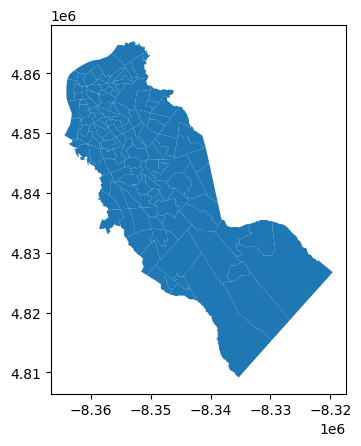

In [ ]:
wd_map.plot()

<Axes: >

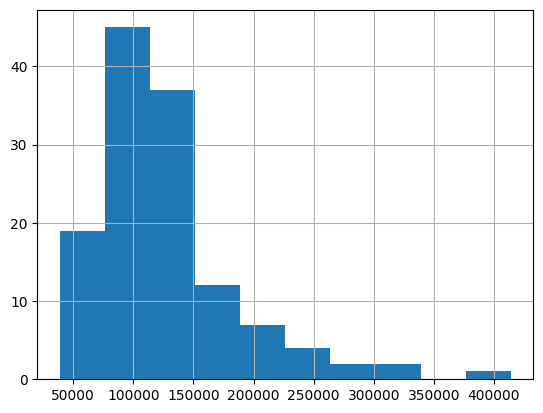

In [ ]:
#do think how distribution translate into colors!!
Cam_sdeterm.Avg_Fam_Inc.hist() #positively skilled   skewed!

<Axes: >

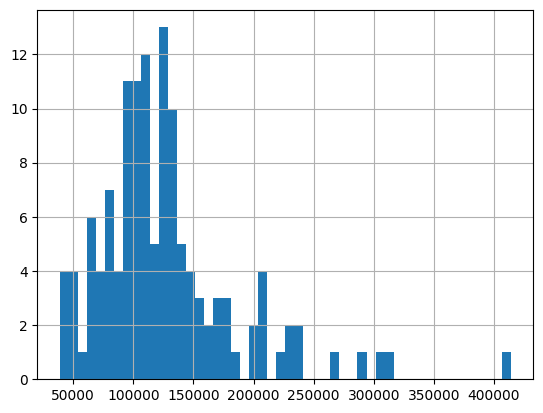

In [ ]:
#do think how distribution translate into colors!!
Cam_sdeterm.Avg_Fam_Inc.hist(bins=50) #postively   skewed!

<Axes: >

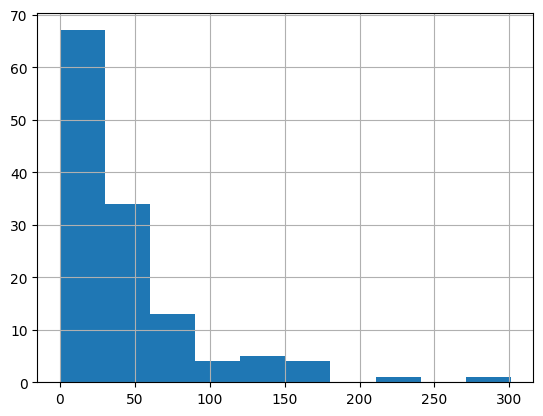

In [ ]:
#do think how distribution translate into colors!!
Cam_sdeterm.Housholds_Public_AssistInc.hist() #positively  skewed!

<Axes: >

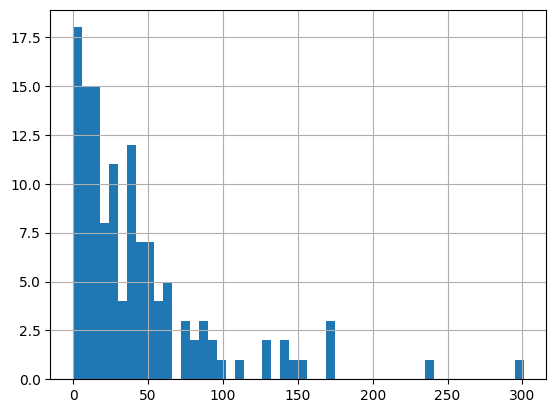

In [ ]:
#do think how distribution translate into colors!!
Cam_sdeterm.Housholds_Public_AssistInc.hist(bins=50) #negatively  skewed!

<Axes: >

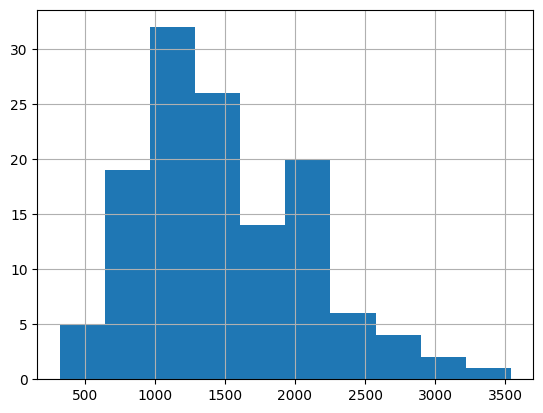

In [ ]:
#do think how distribution translate into colors!!
Cam_sdeterm.Housholds_No_Public_Assist.hist() #negatively  skewed! aok: really?

<Axes: >

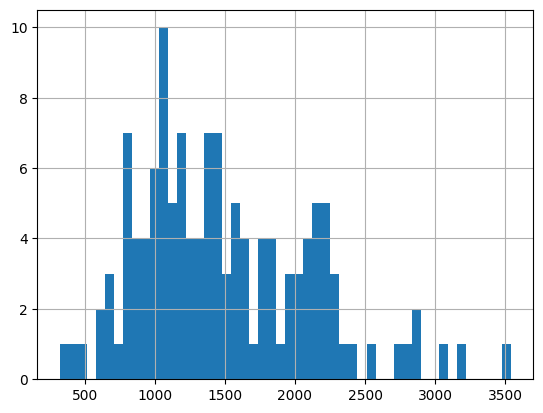

In [ ]:
#do think how distribution translate into colors!!
Cam_sdeterm.Housholds_No_Public_Assist.hist(bins=50) #negatively  skewed!

<Axes: >

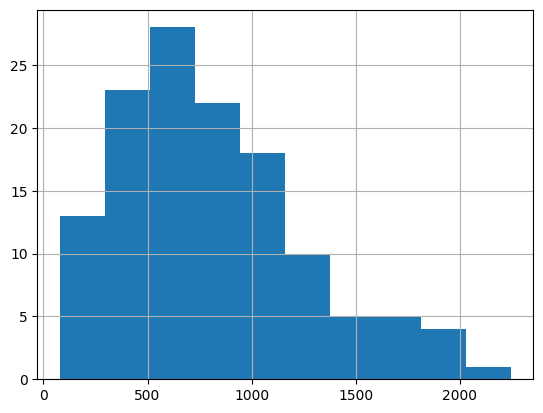

In [ ]:
#do think how distribution translate into colors!!
Cam_sdeterm.HS_Grads_25Plus.hist() #positively  skewed!

<Axes: >

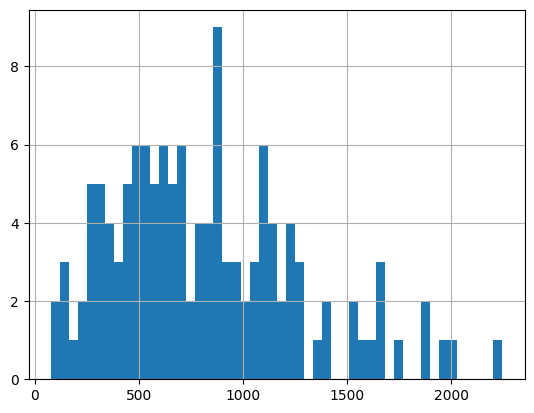

In [ ]:
#do think how distribution translate into colors!!
Cam_sdeterm.HS_Grads_25Plus.hist(bins=50) #negatively  skewed!

<Axes: >

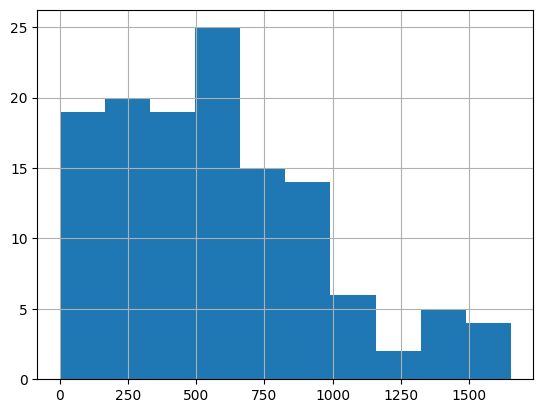

In [ ]:
#do think how distribution translate into colors!!
Cam_sdeterm.Bachelors_25Plus.hist() #positively  skewed!
#A right-skewed distribution typically indicates that while most observations fall within the lower range of values, there are a few higher values (outliers) pulling the mean to the right.

A right-skewed distribution typically indicates that while most observations fall within the lower range of values, there are a few higher values (outliers) pulling the mean to the right.

aok: no, thats not the point, discuss how you translate it into bins; eg the next one 0 to about 650 is one big blob so gonna be one color, then like about 650 to about 1k another, and then up to about 1550, and for last 2 at around 1600k a disctinctive color

<Axes: >

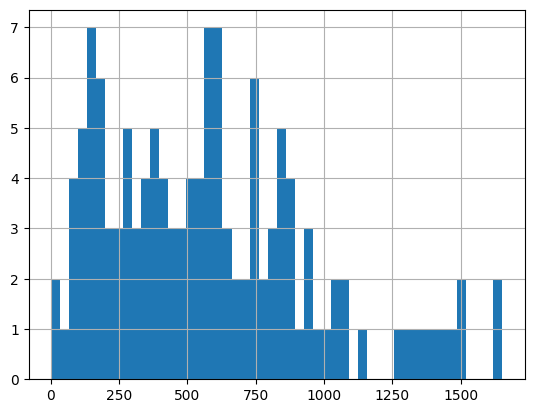

In [ ]:
#do think how distribution translate into colors!!
Cam_sdeterm.Bachelors_25Plus.hist(bins=50) #positively  skewed!



### Two Side-by-Side Comparisons: aok could have more sub-sec like this

**Education and Income

**Education and Employment

**Education and Employment


<Axes: >

[]

[]

<Axes: >

[]

[]

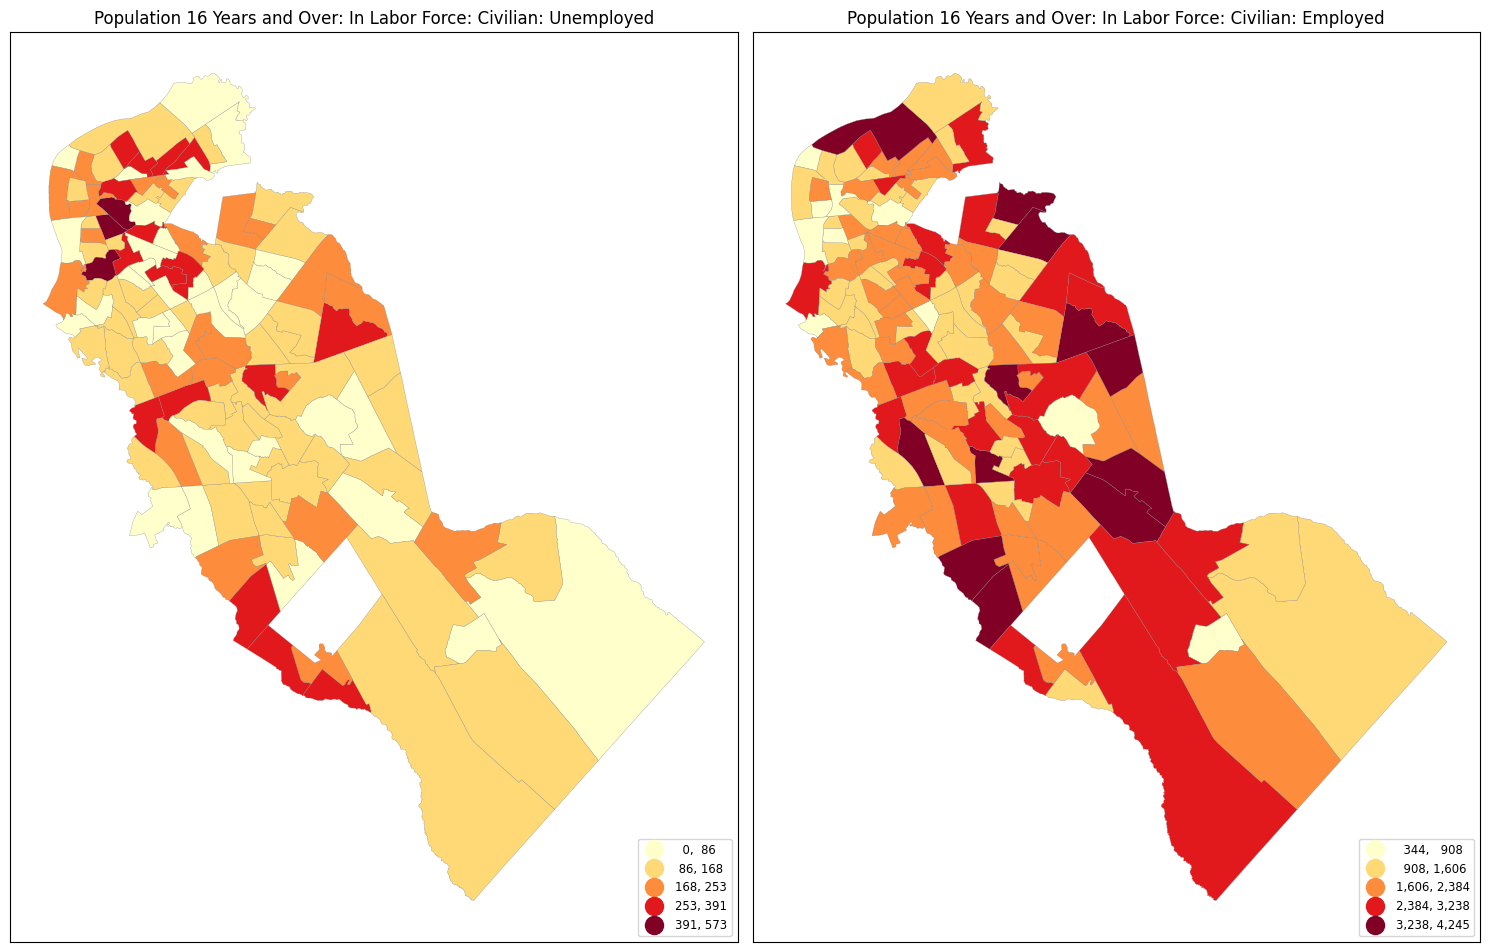

In [ ]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(15,10),sharey=True, tight_layout=True)
merged_data.plot(ax=axs[0],column='Unemployed_16Plus',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population 16 Years and Over: In Labor Force: Civilian: Unemployed")
axs[0].set_xticks([]); axs[0].set_yticks([])
merged_data.plot(ax=axs[1],column='Employed_16Plus',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Population 16 Years and Over: In Labor Force: Civilian: Employed")
axs[1].set_xticks([]); axs[1].set_yticks([])

#aok!!! do remember about missing values; need to say in legend eg white=missing like we did in class
#and be criticial eg this shows some tracts have 0 unemployed, possible but rather rare, double check
#which year is this for? add map with percent

Educational attainment at 25years and over

<Axes: >

[]

[]

<Axes: >

[]

[]

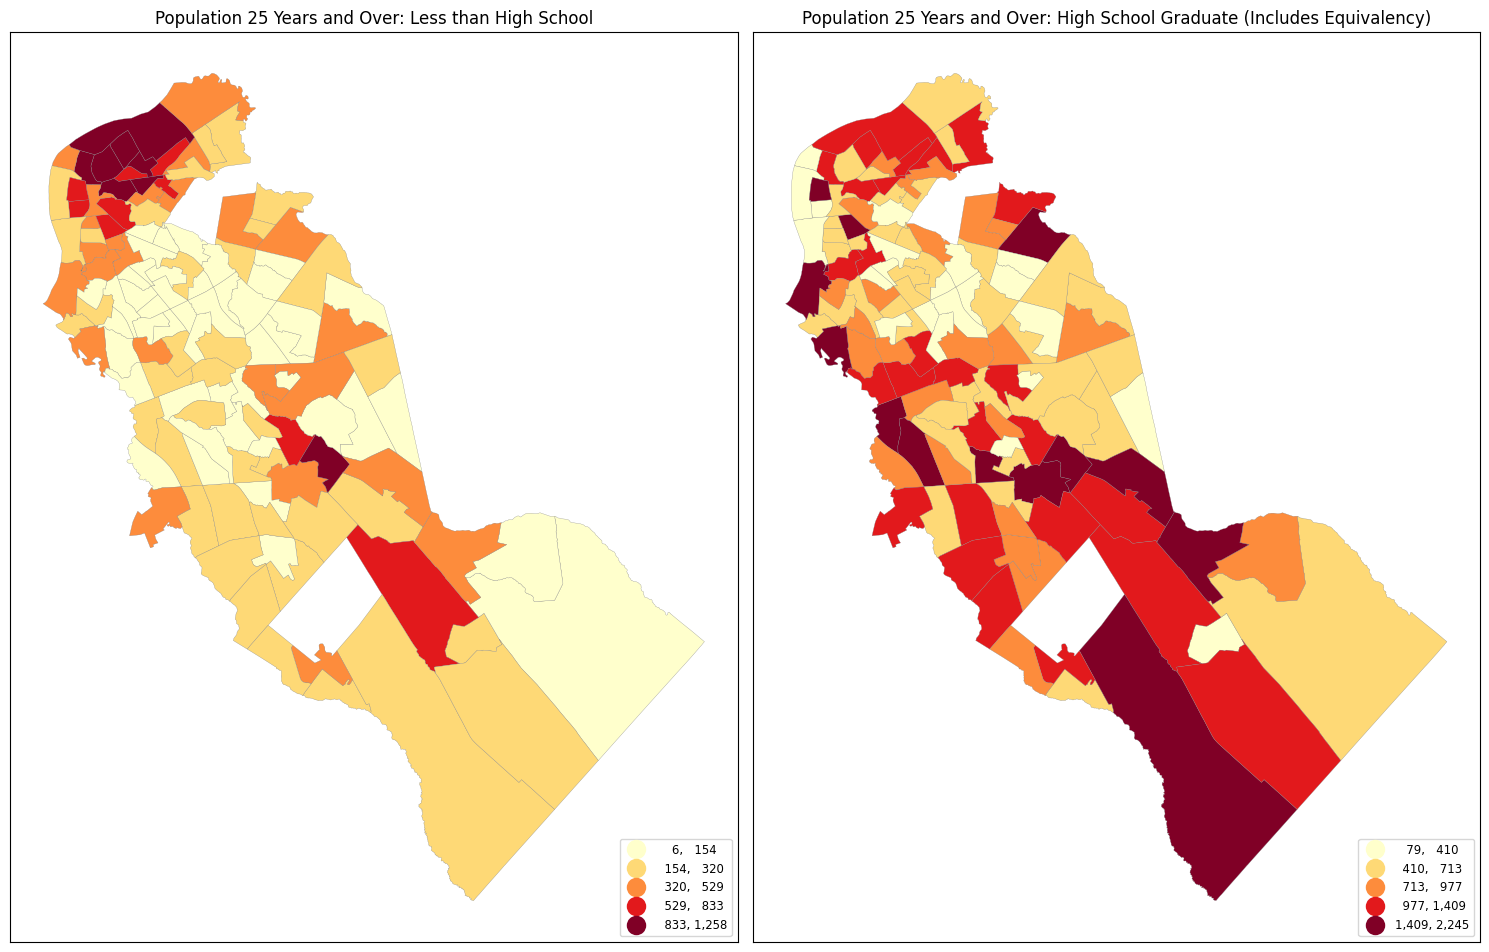

In [ ]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(15,10),sharey=True, tight_layout=True)
merged_data.plot(ax=axs[0],column='Less_HS_25Plus',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population 25 Years and Over: Less than High School")
axs[0].set_xticks([]); axs[0].set_yticks([])
merged_data.plot(ax=axs[1],column='HS_Grads_25Plus',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Population 25 Years and Over: High School Graduate (Includes Equivalency)")
axs[1].set_xticks([]); axs[1].set_yticks([])

TRENDS IN INSURANCE COVERAGE

Total, Total: No Health insurance coverage, Total:With health insurance coverage

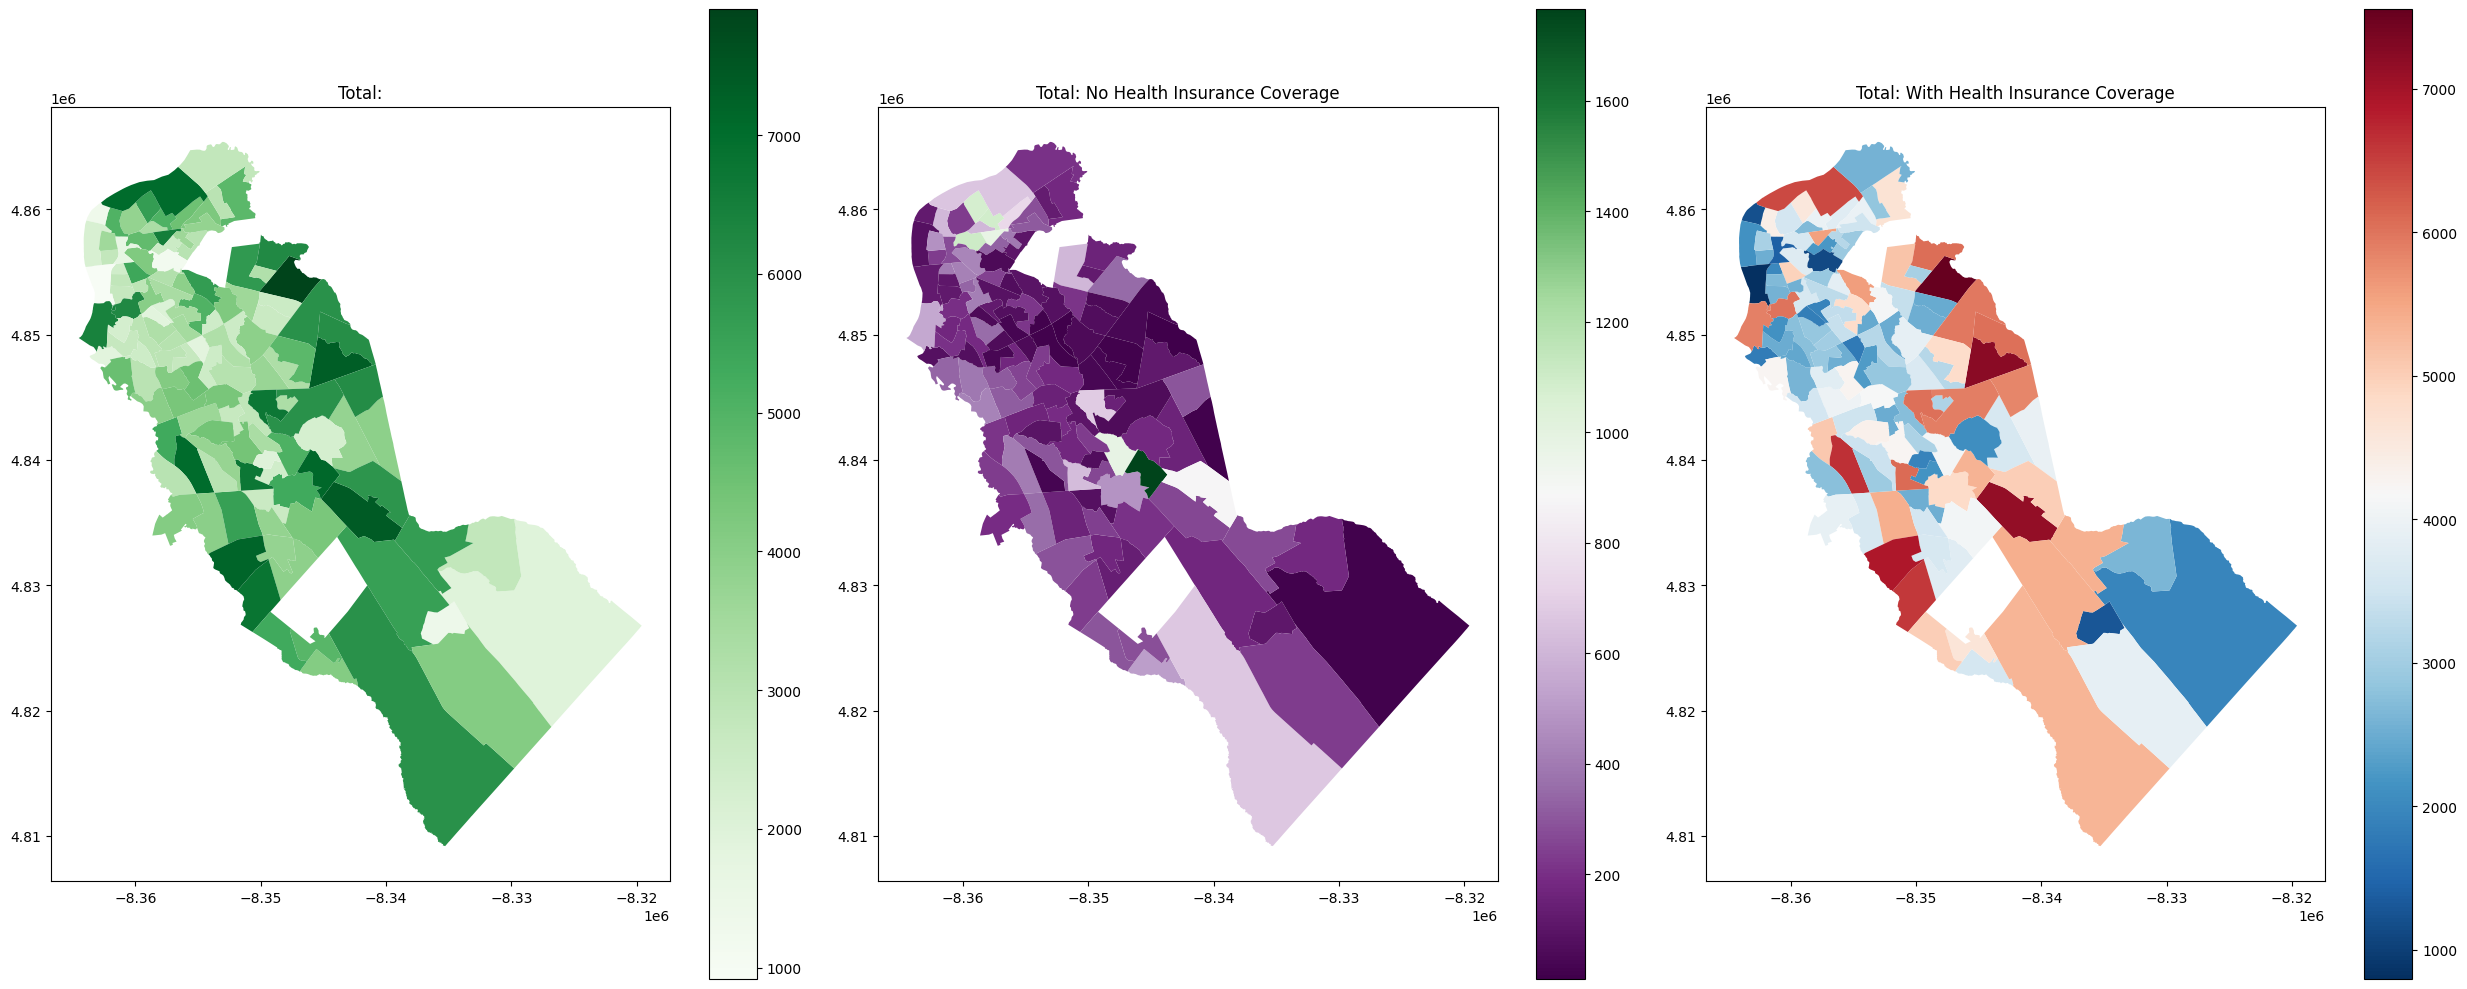

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


# 2. Create Three Side-by-Side Maps

#"BuGn""YlGn""winter""spring""PRGn""RdBu"

fig, axes = plt.subplots(1, 3, figsize=(25, 10))  # 1 row, 3 columns

# Map 1: Educational Attainment
merged_data.plot(column='Total', cmap='Greens', legend=True, ax=axes[0])
axes[0].set_title('Total:')

# Map 2: Household with Income Assistance
merged_data.plot(column='Total_No_Health_Ins', cmap='PRGn', legend=True, ax=axes[1])
axes[1].set_title('Total: No Health Insurance Coverage')

# Map 3: Employment Over 16 Years and Above
merged_data.plot(column='Total_With_Health_Ins', cmap='RdBu_r', legend=True, ax=axes[2])
axes[2].set_title('Total: With Health Insurance Coverage')

plt.tight_layout()  # Adjust spacing between subplots
plt.show();

#aok: again percents probably better

Disparities:

There are clear disparities in health insurance coverage across Camden County. Some areas have high populations but relatively low insurance coverage, suggesting gaps in healthcare access.

aok: which areas? name them; any clusters? any outliers? anything unexpected etc etc

 DEMOGRAPHICS: POPULATION WITH INSURANCE  

 FOCUSING ON : NO Health Insurance, With Health Insurance ,Population 65 or Older: With Health Insurance Coverage,Population 65 or OlderNo Health Insurance Coverage

Making three maps to visualise the pattern : Population 65 or Older: With Health Insurance Coverage and Population 65 or OlderNo Health Insurance Coverage

making scatter plots to understand the pattern: with health insurance population and no health insurance
making histogram

DEMOGRAPHICS: HOUSEHOLDS WITH INCOME ASSISTANCE

Households:
Households: With Public Assistance Income,
Households: No Public Assistance Income,
Households: With Retirement Income,
Households: No Retirement Income

making histogram, scatter plot and classification to visualize the the patterns in income assistance of household and other determinants

HOUSEHOLD ASSISTED INCOME by CENSUS TRACT

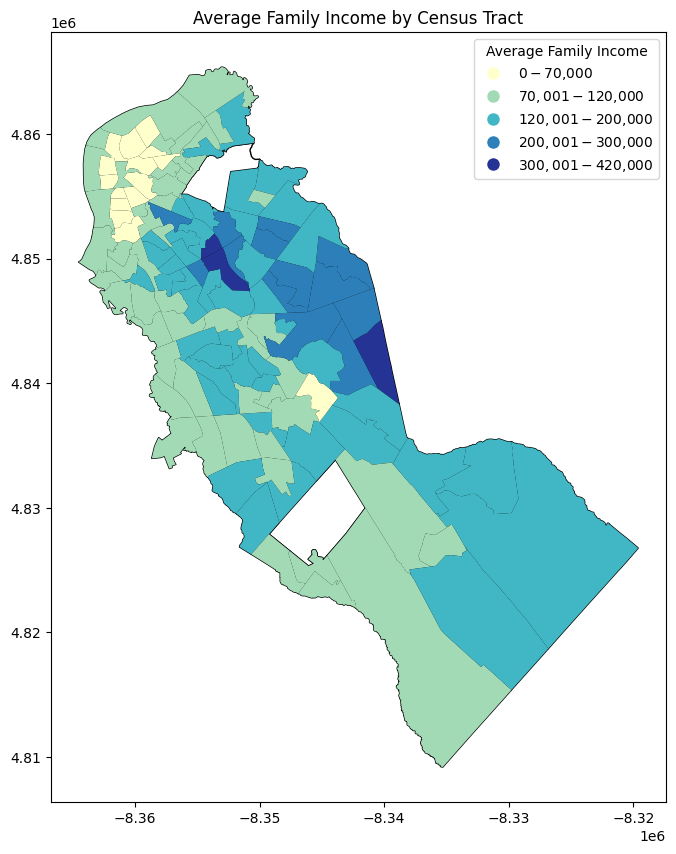

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import geopandas as gpd

# Define income bins, labels, and colors
income_bins = [0, 70000, 120000, 200000, 300000, 420000]
income_labels = [
    '$0 - $70,000', '$70,001 - $120,000', '$120,001 - $200,000',
    '$200,001 - $300,000', '$300,001 - $420,000' # Added a label to match the number of bins
]
# Extend color palette to match the number of bins
colors = ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']

# Create a new column 'income_category' based on income bins and labels
merged_data['income_category'] = pd.cut(merged_data['Avg_Fam_Inc'], bins=income_bins, labels=income_labels)

# Set up custom color map and normalization
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(income_bins, cmap.N)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the base layer with white background and black borders (if needed, replace `wd_map` with `merged_data`)
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot the income categories on the map
merged_data.plot(ax=ax, column='income_category', cmap=cmap, legend=False)

# Create custom legend handles
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for color, label in zip(colors, income_labels)
]

# Display custom legend
ax.legend(handles=handles, title='Average Family Income')

# Set the title
plt.title('Average Family Income by Census Tract')
plt.show();


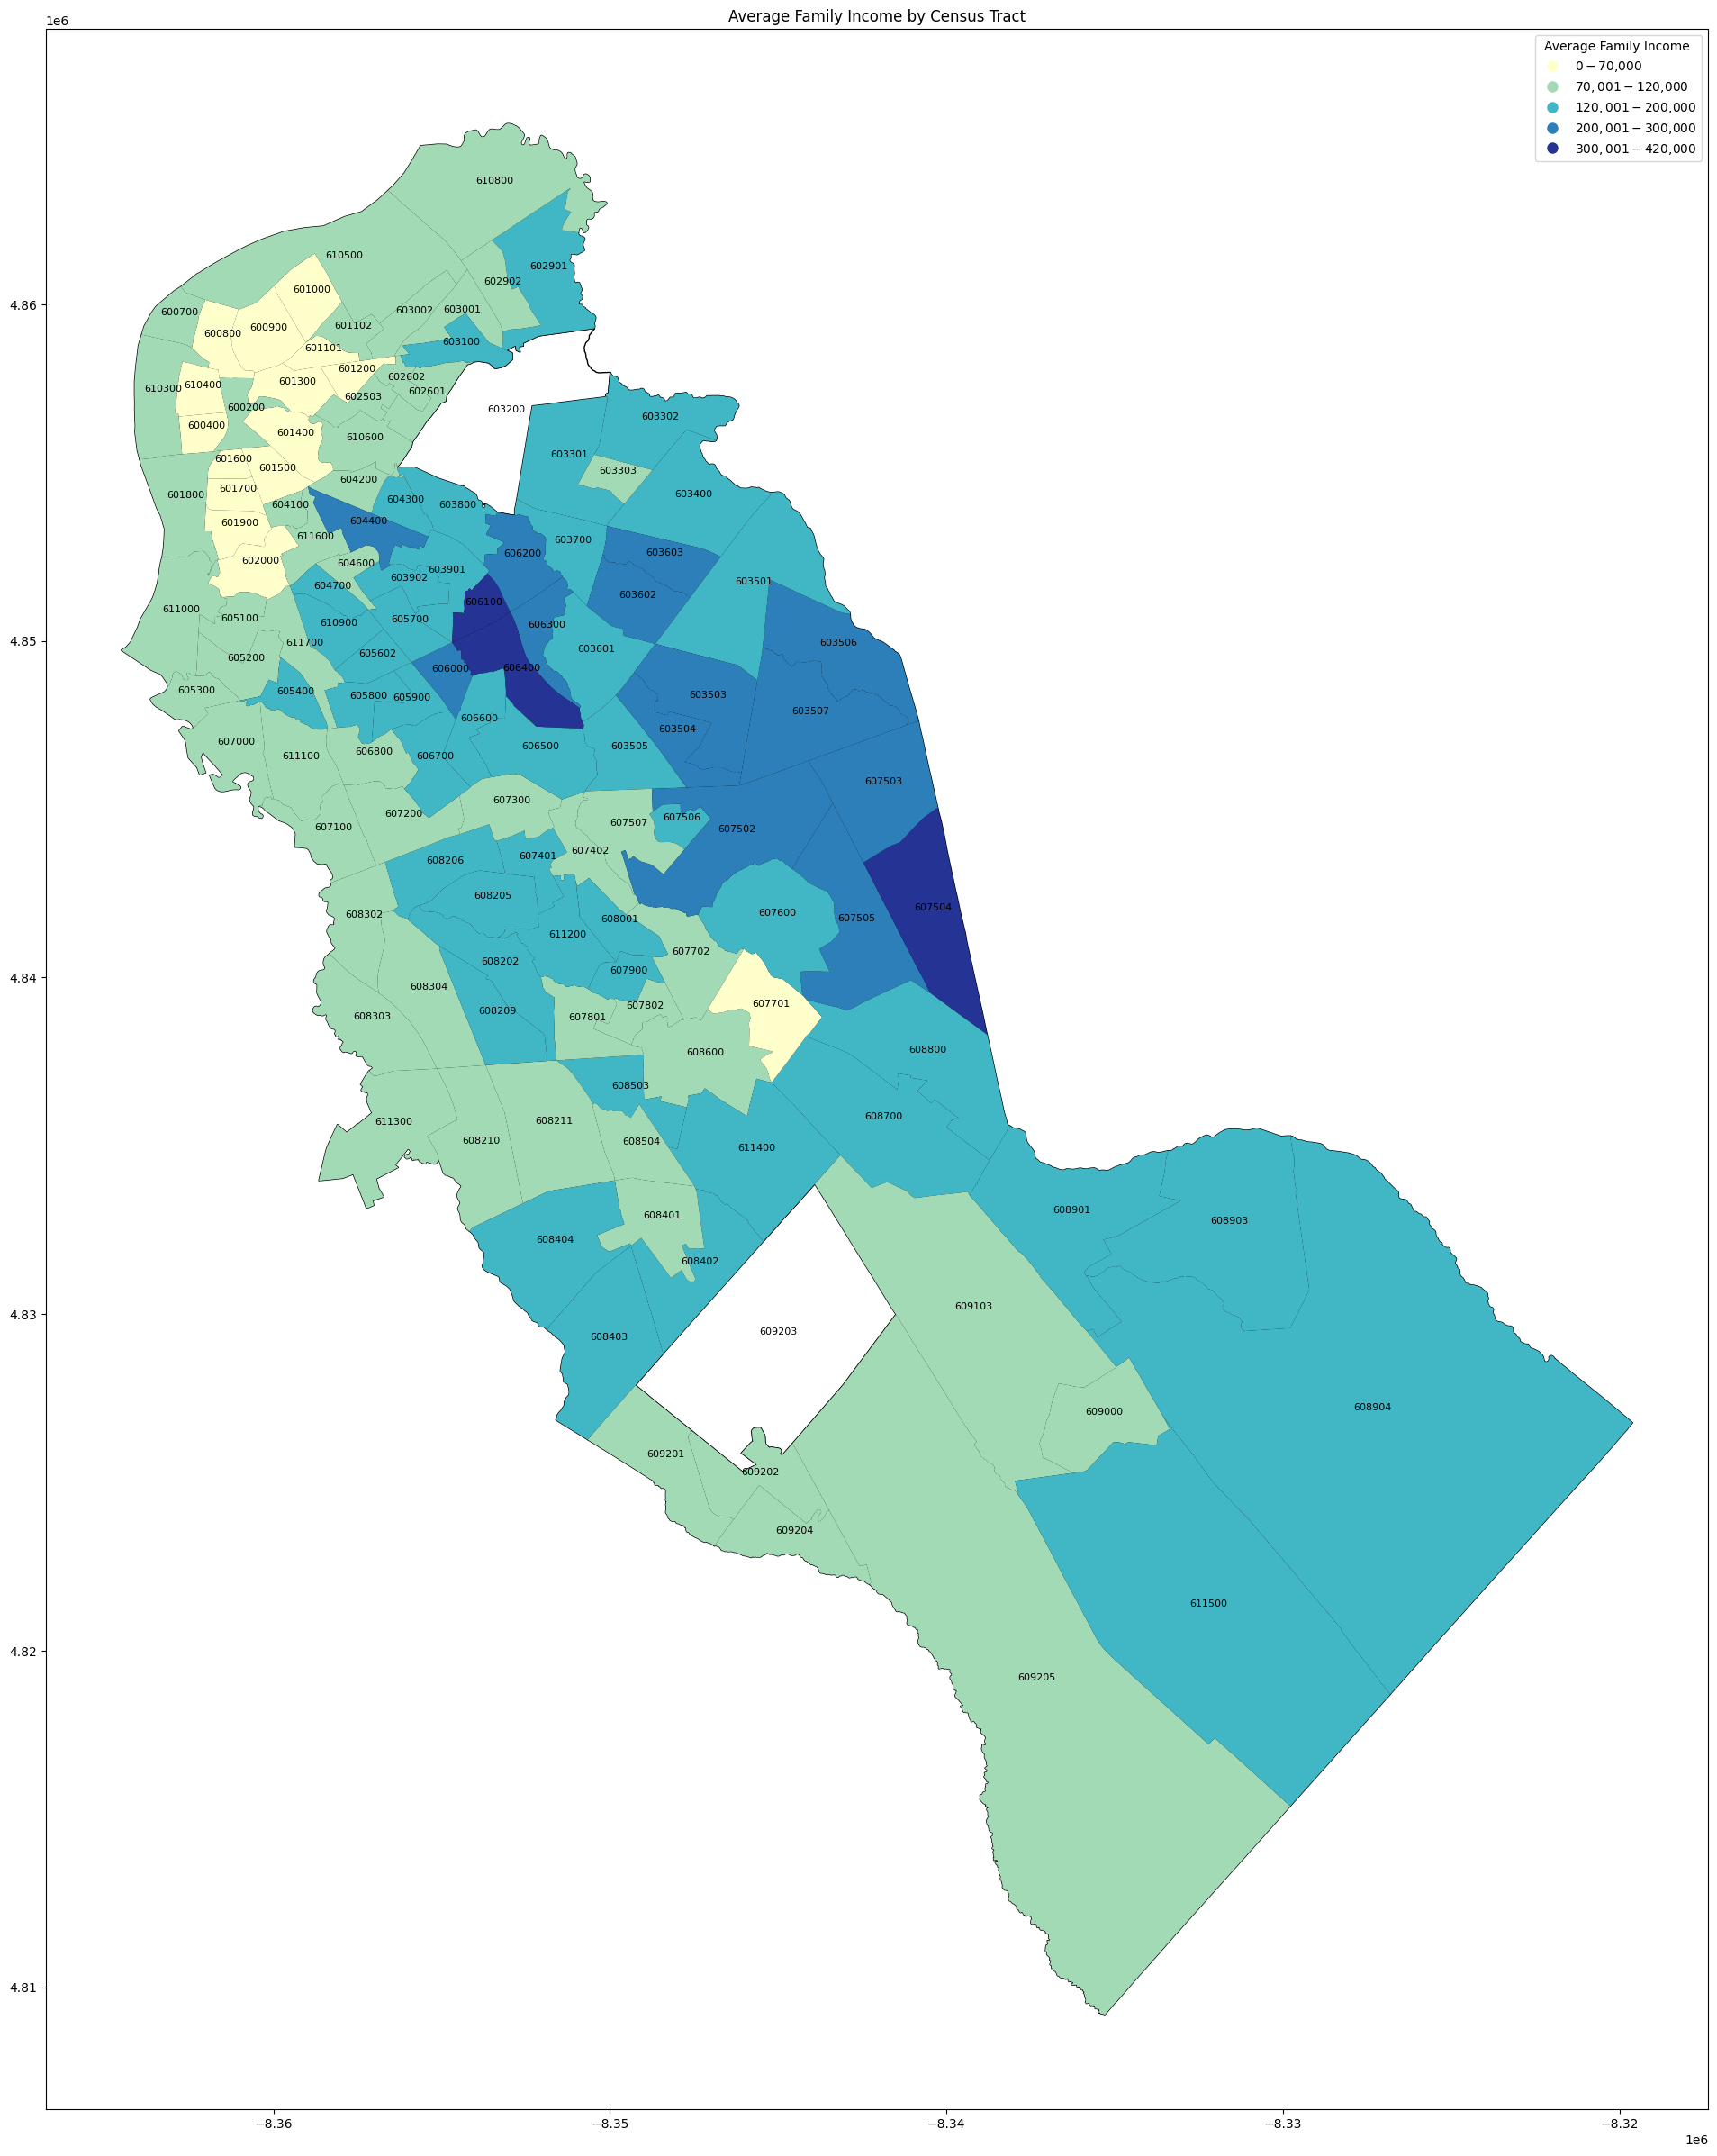

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd

# Define income bins, labels, and colors
income_bins = [0, 70000, 120000, 200000, 300000, 420000]
income_labels = [
    '$0 - $70,000', '$70,001 - $120,000', '$120,001 - $200,000',
    '$200,001 - $300,000', '$300,001 - $420,000' # Added a label to match the number of bins
]
# Extend color palette to match the number of bins
colors = ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']

# Create a new column 'income_category' based on income bins and labels
merged_data['income_category'] = pd.cut(merged_data['Avg_Fam_Inc'], bins=income_bins, labels=income_labels)

# Set up custom color map and normalization
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(income_bins, cmap.N)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(40, 30))
# Plot the base layer with white background and black borders
wd_map.plot(ax=ax, color='white', edgecolor='black')

# Plot the income categories on the map
merged_data.plot(ax=ax, column='income_category', cmap=cmap, legend=True,
                 legend_kwds={'title': 'Average Family Income '})

# Add tract IDs to the map as text labels
for idx, row in merged_data.iterrows():
    # Get the centroid of each geometry
    centroid = row['geometry'].centroid
    # Annotate with tract ID at the centroid location
    ax.annotate(
        text=row['Geo_TRACT'],  # Replace 'tract_id' with the actual column name for tract IDs
        xy=(centroid.x, centroid.y),
        xytext=(3, 3),  # Offset the text slightly for better readability
        textcoords="offset points",
        fontsize=8,
        ha='center'
    )

# Create custom legend handles
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for color, label in zip(colors, income_labels)
]
# Display custom legend
ax.legend(handles=handles, title='Average Family Income ')
# Set the title
plt.title('Average Family Income by Census Tract')
plt.show();

#aok this is good i like it with census tract numbers!


Interpretation of Key Findings
Income Disparities Across the County:
The map shows a clear geographic disparity in family income levels


*   within Camden County. Darker blue areas, indicating higher income levels, are concentrated in certain census tracts, while lighter areas represent lower-income neighborhoods.



*  Higher-Income Areas: Tracts with darker shades, mostly located on
the eastern side of the map, have average family incomes in the range of $200,001 to $420,000. These areas likely have better access to resources such as quality schools, healthcare, and housing, contributing to a higher quality of life.
Lower-Income Areas: The lighter-colored tracts, primarily in the

*  northern and central sections, show lower average family incomes, typically under $120,000. These areas may face more economic challenges, such as reduced access to quality education, healthcare, and other resources that impact residents' well-being.

aok
607701 is interesting! an outlier, different from its neighbors--discuss it; also folium would be helpful to see where these places are


side by side map classsification of household with income assistance, education attainmnet and Employment Over 16 Years and Above

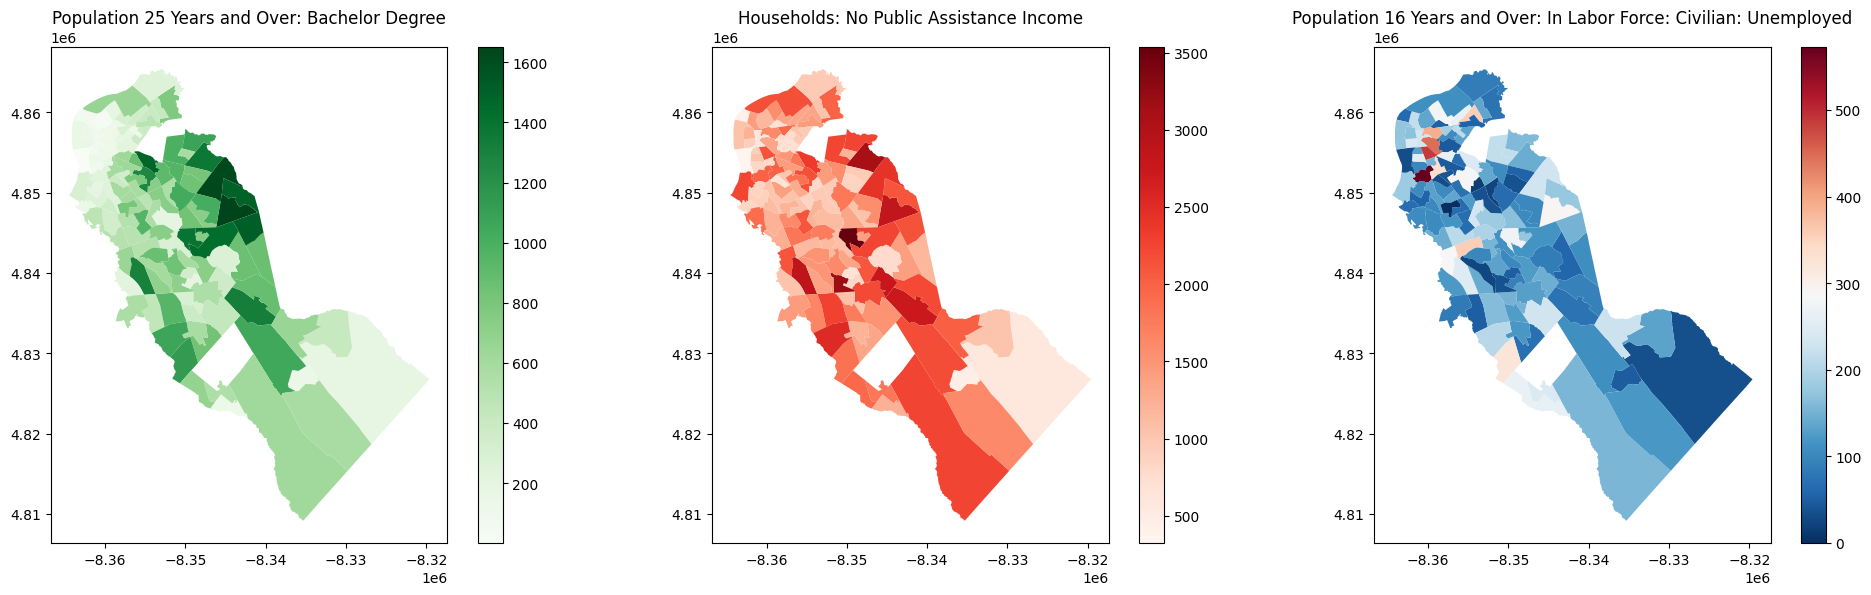

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


# 2. Create Three Side-by-Side Maps

#"BuGn""YlGn""winter""spring""PRGn""RdBu"

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# Map 1: Educational Attainment
merged_data.plot(column='Bachelors_25Plus', cmap='Greens', legend=True, ax=axes[0])
axes[0].set_title('Population 25 Years and Over: Bachelor Degree')

# Map 2: Household with Income Assistance
merged_data.plot(column='Housholds_No_Public_Assist', cmap='Reds', legend=True, ax=axes[1])
axes[1].set_title('Households: No Public Assistance Income')

# Map 3: Employment Over 16 Years and Above
merged_data.plot(column='Unemployed_16Plus', cmap='RdBu_r', legend=True, ax=axes[2])
axes[2].set_title('Population 16 Years and Over: In Labor Force: Civilian: Unemployed')

plt.tight_layout()  # Adjust spacing between subplots
plt.show();

Education, Employment, and Income Assistance

These three variables together provide a multi-faceted view of quality of life in Camden, linking economic conditions with healthcare access and focusing on a highly vulnerable age group +Average Family Income (In 2022 Inflation Adjusted Dollars
+Total: No Health Insurance Coverage
+Population 65 or Older: No Health Insurance Coverage

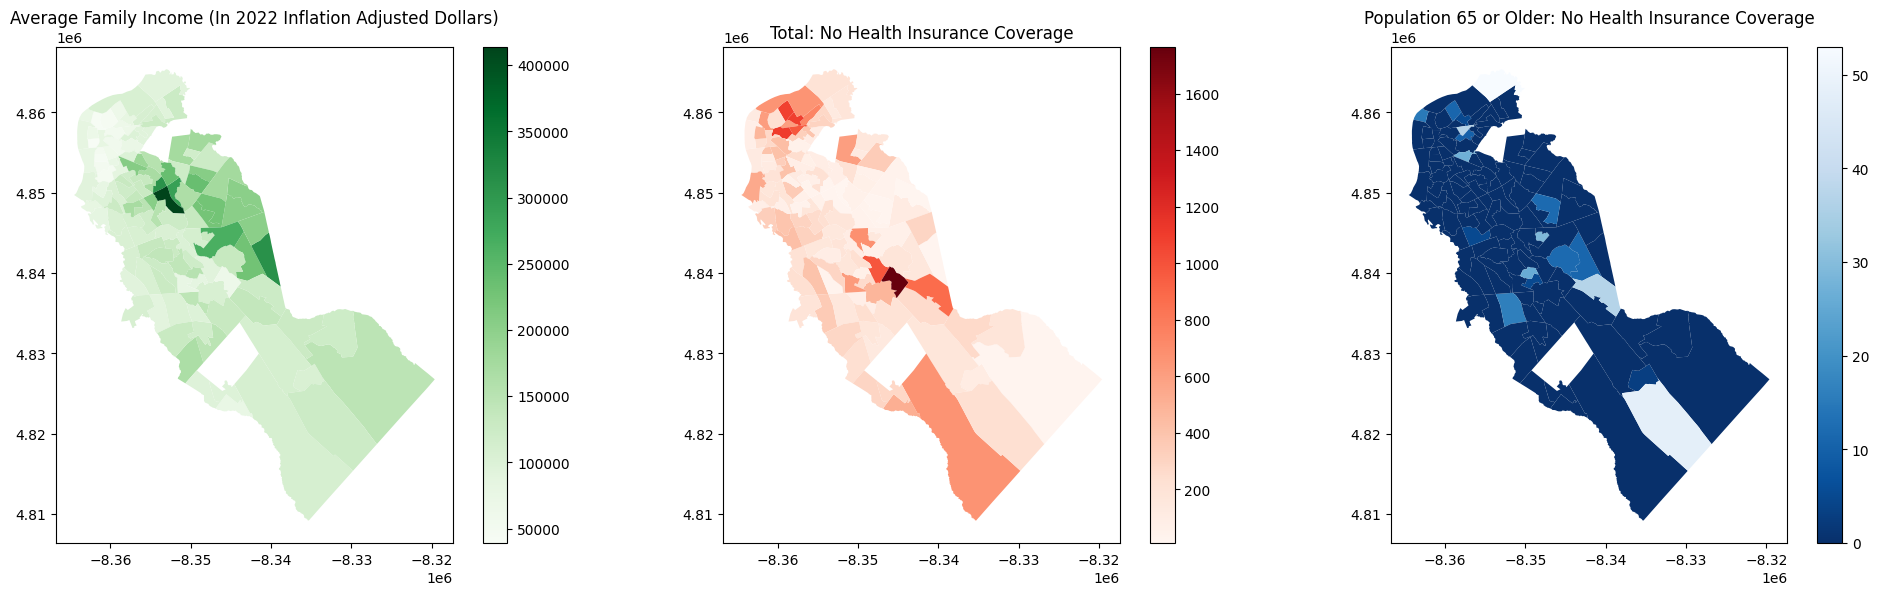

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


# 2. Create Three Side-by-Side Maps

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# Map 1: Average Family Income (In 2022 Inflation Adjusted Dollars
merged_data.plot(column='Avg_Fam_Inc', cmap='Greens', legend=True, ax=axes[0])
axes[0].set_title('Average Family Income (In 2022 Inflation Adjusted Dollars)')

# Map 2: Total: No Health Insurance Coverage
merged_data.plot(column='Total_No_Health_Ins', cmap='Reds', legend=True, ax=axes[1])
axes[1].set_title('Total: No Health Insurance Coverage')

# Map 3: Population 65 or Older: No Health Insurance Coverage
merged_data.plot(column='Pop_65Plus_No_Health_Ins', cmap='Blues_r', legend=True, ax=axes[2])
axes[2].set_title('Population 65 or Older: No Health Insurance Coverage')

plt.tight_layout()  # Adjust spacing between subplots
plt.show();

COLOR CODES

'Deepblue' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'n...

THREE SIDED MAP

+Avg_Fam_Income_2022 (Economic stability),
+Total_No_Health_Ins (Healthcare access),
+Households_Public_Assist (Economic vulnerability).


These visualizations would reveal Camden neighborhoods where quality of life is likely lower, helping to identify areas that may benefit from targeted interventions or support.

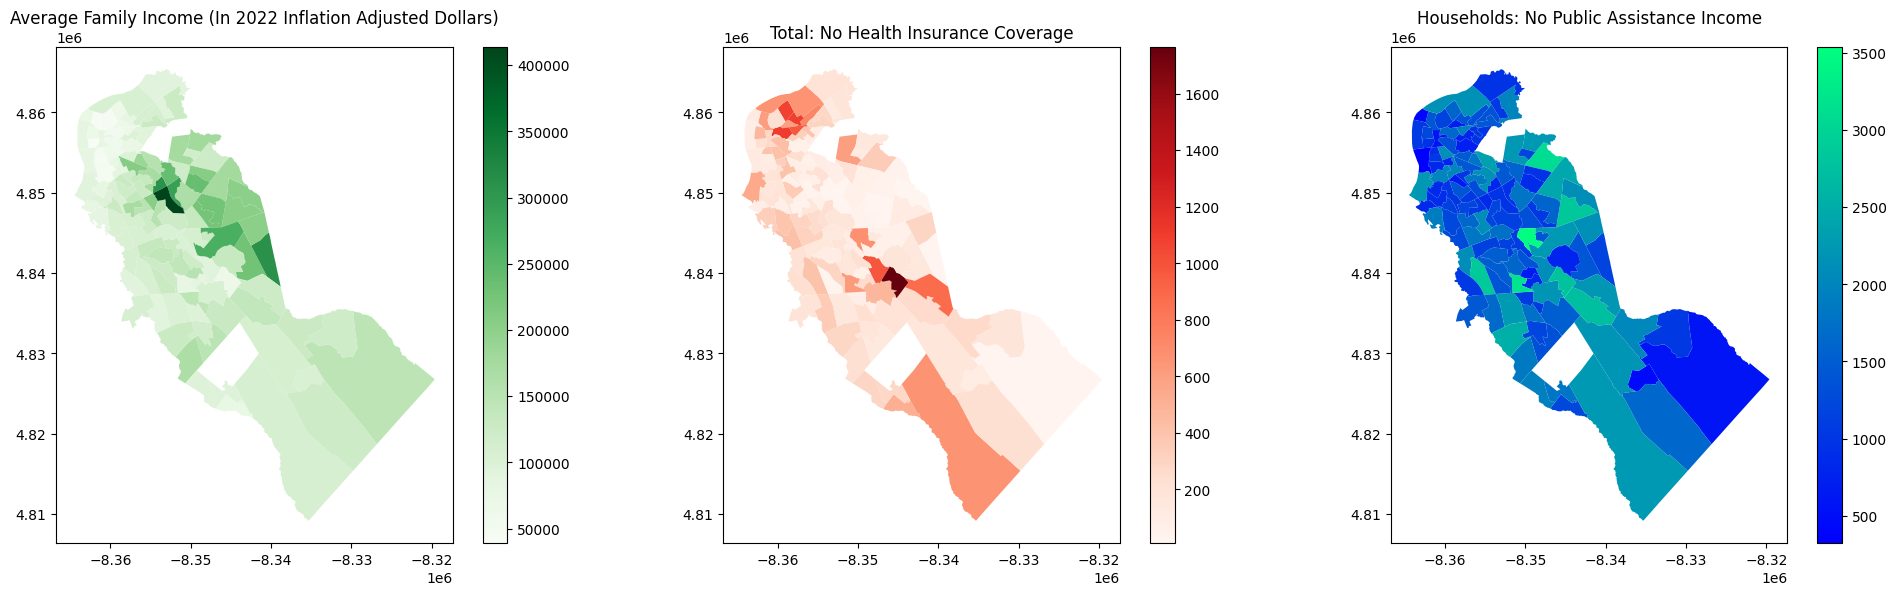

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


# 2. Create Three Side-by-Side Maps

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# Map 1: Average Family Income (In 2022 Inflation Adjusted Dollars
merged_data.plot(column='Avg_Fam_Inc', cmap='Greens', legend=True, ax=axes[0])
axes[0].set_title('Average Family Income (In 2022 Inflation Adjusted Dollars)')

# Map 2: Total: No Health Insurance Coverage
merged_data.plot(column='Total_No_Health_Ins', cmap='Reds', legend=True, ax=axes[1])
axes[1].set_title('Total: No Health Insurance Coverage')

# Map 3: Population 65 or Older: No Health Insurance Coverage
merged_data.plot(column='Housholds_No_Public_Assist', cmap='winter', legend=True, ax=axes[2])
axes[2].set_title('Households: No Public Assistance Income')

plt.tight_layout()  # Adjust spacing between subplots
plt.show();

#aok; again nobody uses family income; median hh income better; and again for last 2 maps percents better




**Economic Disparities and Quality of Life:**
•	Reliance on Public Assistance: In areas with a high reliance on public assistance, economic vulnerability is evident. Households dependent on public assistance are typically associated with lower income, job insecurity, and a higher risk of poverty contributing to reduced quality of life

•	Income Inequality: There is a noticeable disparity in average family income across Camden County, with some areas showing significantly lower income levels.

**Healthcare Access Challenges**
•	High Uninsurance Rates: Certain neighborhoods show a high number of individuals without health insurance. Lack of insurance is a significant barrier to healthcare access, often resulting in delayed care, untreated health conditions, and a reliance on emergency services for medical needs

•	Elderly Population Without Insurance: The concentration of uninsured elderly individuals in some areas highlights a critical healthcare gap

**Correlation Between Economic and Healthcare Vulnerability**
•	Economic and Healthcare Overlap: There is a correlation between lower-income areas, high uninsurance rates, and reliance on public assistance, suggesting that economic and healthcare vulnerabilities are interconnected.

•	Residents in economically disadvantaged neighborhoods not only struggle with financial stability but also face significant barriers to accessing healthcare. This combination exacerbates quality-of-life challenges, leading to poorer health outcomes and increased stress.


Education, Employment, and Income Assistance



**Population Distribution in Camden County: Employment Status and Health Insurance Coverage Patterns**

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Population by Education public Assistance and Health coverage (1 Dot = 100 People)')

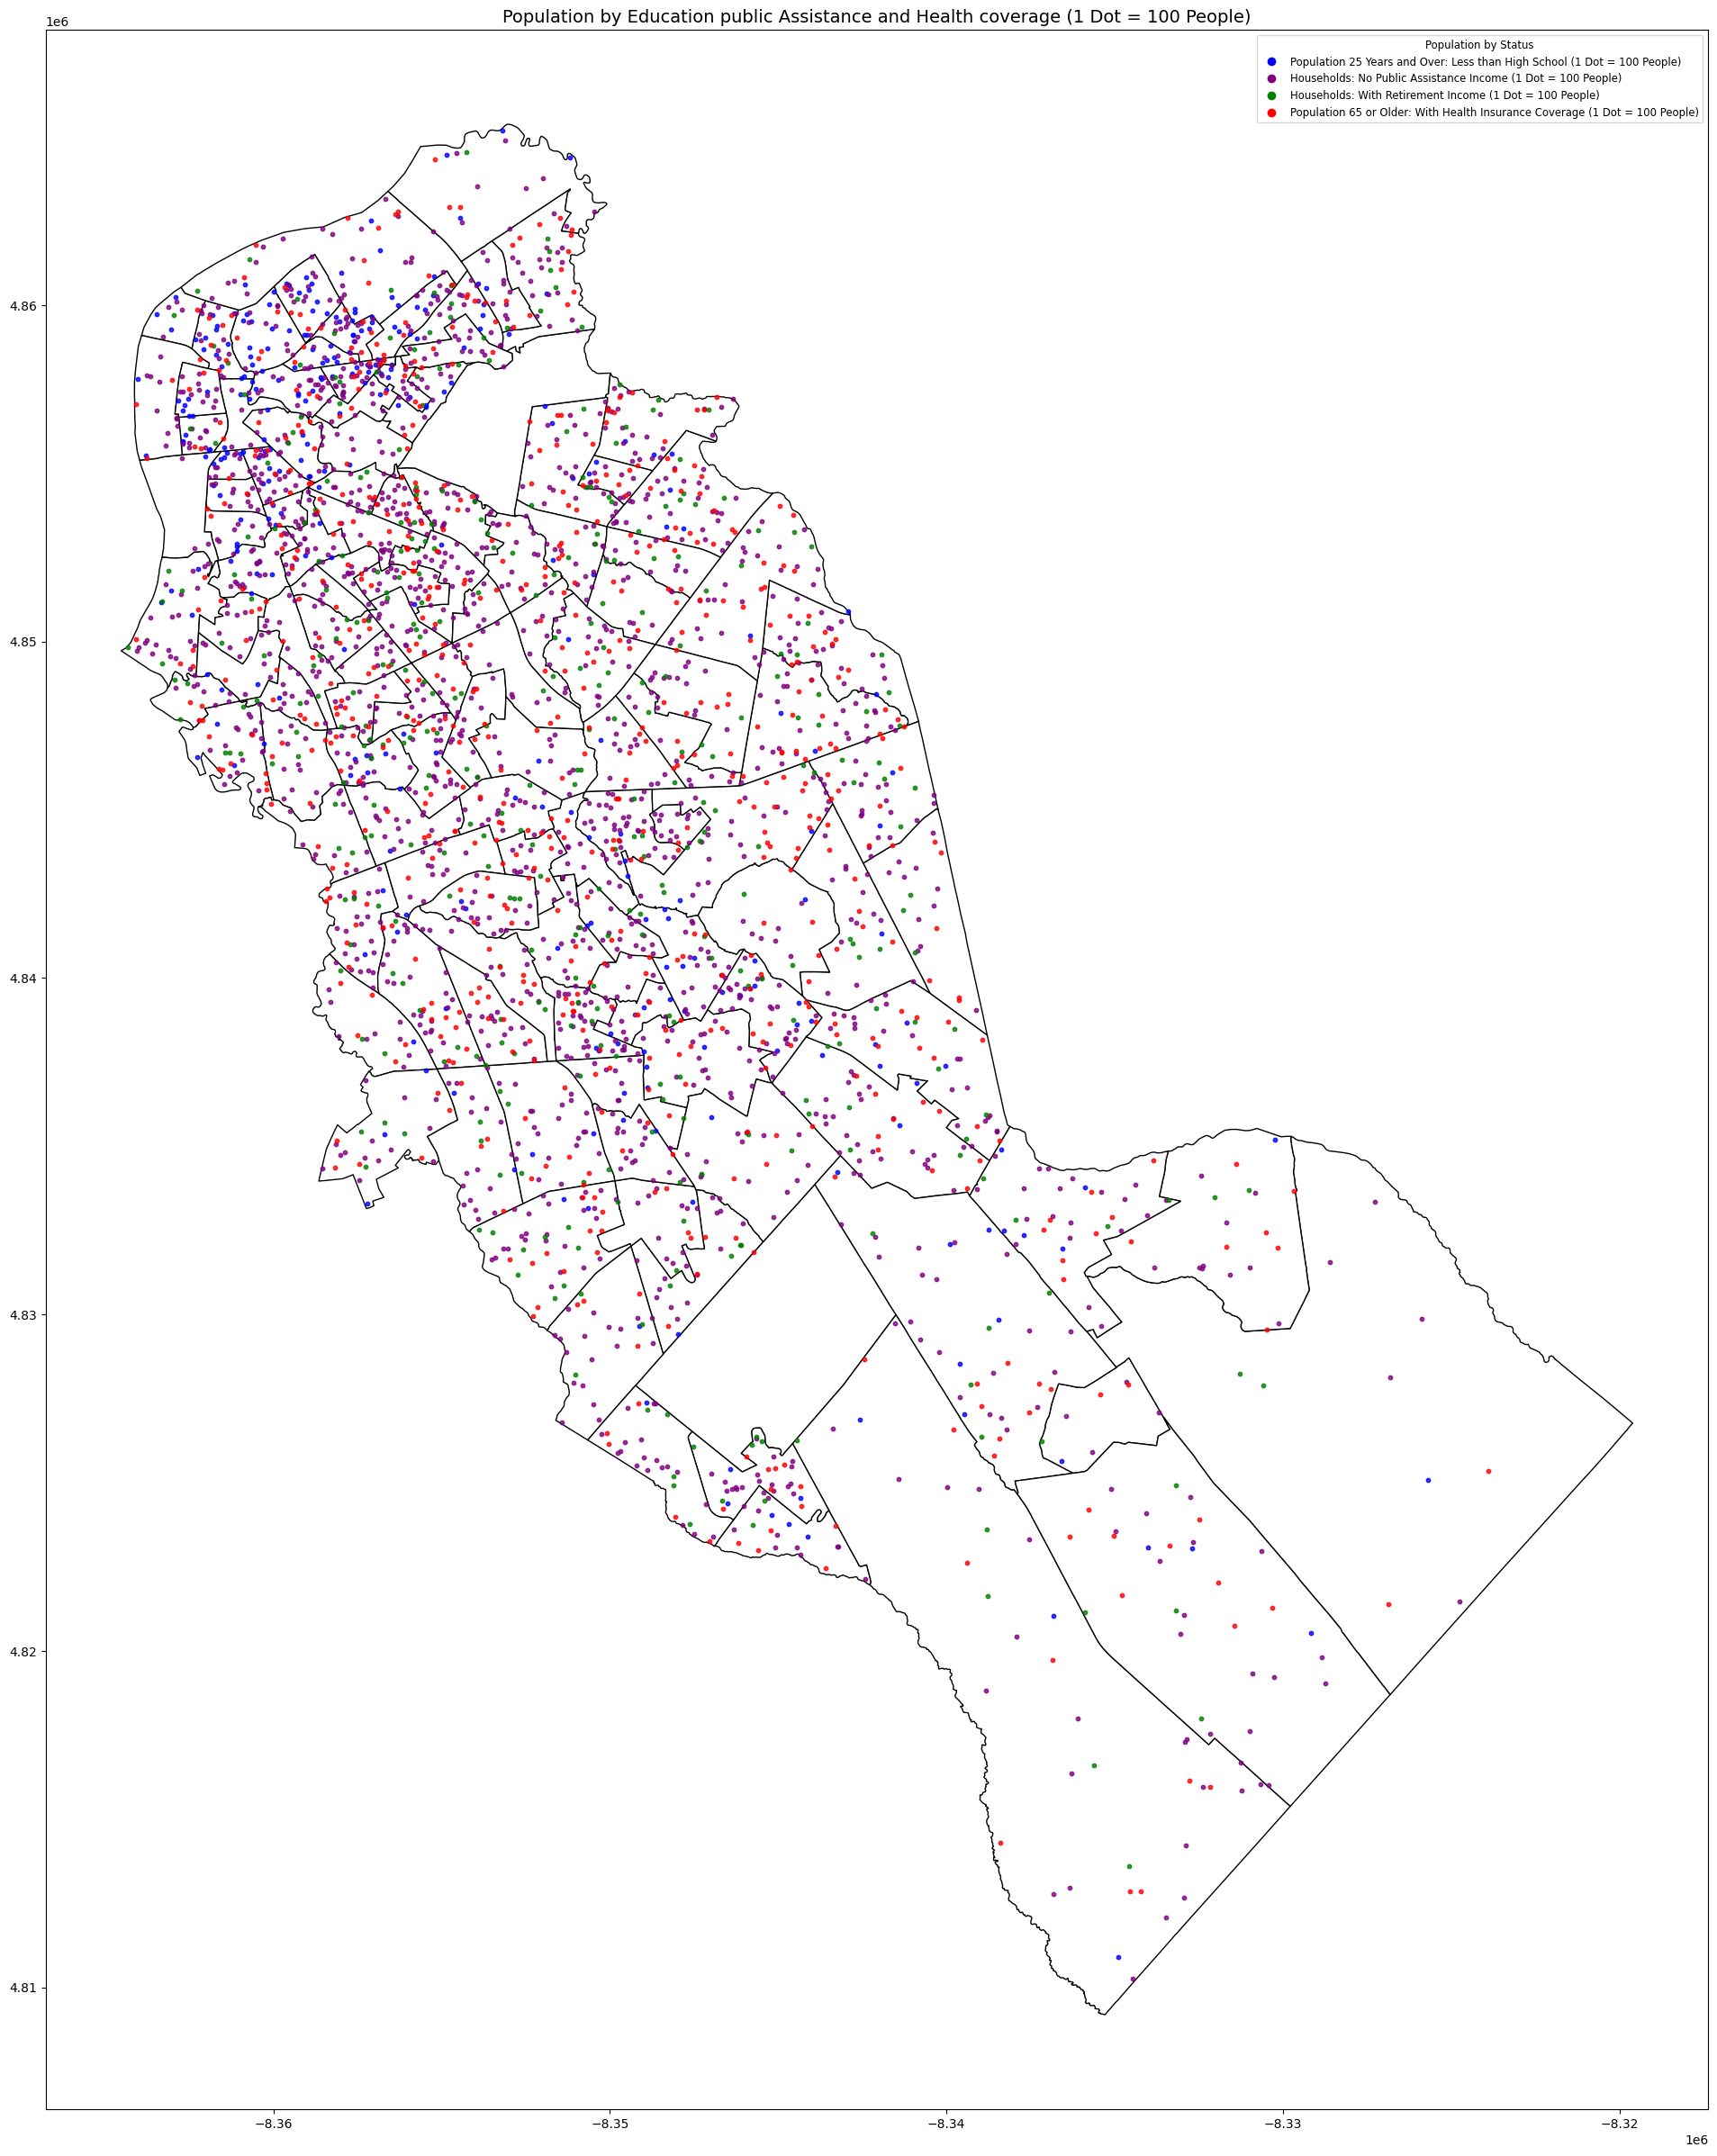

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd

# Define your data mappings
people_status_colors = {
    'Population 25 Years and Over: Less than High School': 'blue',
    'Households: No Public Assistance Income': 'purple',
    'Households: With Retirement Income': 'green',
    'Population 65 or Older: With Health Insurance Coverage': 'red',
}
people_status_columns = {
    'Population 25 Years and Over: Less than High School': 'Less_HS_25Plus', # Fixed: Added ': Employed' to the key to match people_status_colors
    'Households: No Public Assistance Income': 'Housholds_No_Public_Assist',
    'Households: With Retirement Income': 'Housholds_Retire_Inc',
    'Population 65 or Older: With Health Insurance Coverage': 'Pop_65Plus_With_Health_Ins'
}
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(40, 30))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')
# Set plot title
plt.title('Population by Education public Assistance and Health coverage (1 Dot = 100 People)', fontsize=14)
plt.show()

**Findings**

**Education level ( purple dots):** Many areas show a high concentration of adults without a high school diploma, which limits job opportunities and income potential, impacting quality of life.



**Economic stability  (Green Dots):** Areas with fewer households not on public assistance indicate higher reliance on financial aid, suggesting economic vulnerability and a need for job training and financial support programs.



**Retirement security(Blue Dots):** Variations in households with retirement income suggest that some areas may lack financial security for older residents, potentially creating challenges for seniors without stable retirement resources.



**Health care access for elderly  (Red Dots):** While many elderly residents have health insurance, certain areas show gaps, suggesting that some seniors may lack access to necessary healthcare, which is crucial for their well-being.


**Combined Socioeconomic Vulnerabilities**
•	Overlap of Vulnerabilities: In some areas, there is an overlap of high densities of purple dots (low educational attainment) and low concentrations of green and blue dots (potentially indicating economic dependence and lack of retirement income).



T**HIS MAP UNDERSCORES THE CLOSE LINK BETWEEN EMPLOYMENT,HEALTHCARE ACCESS,AND QUALITY OF LIFE**

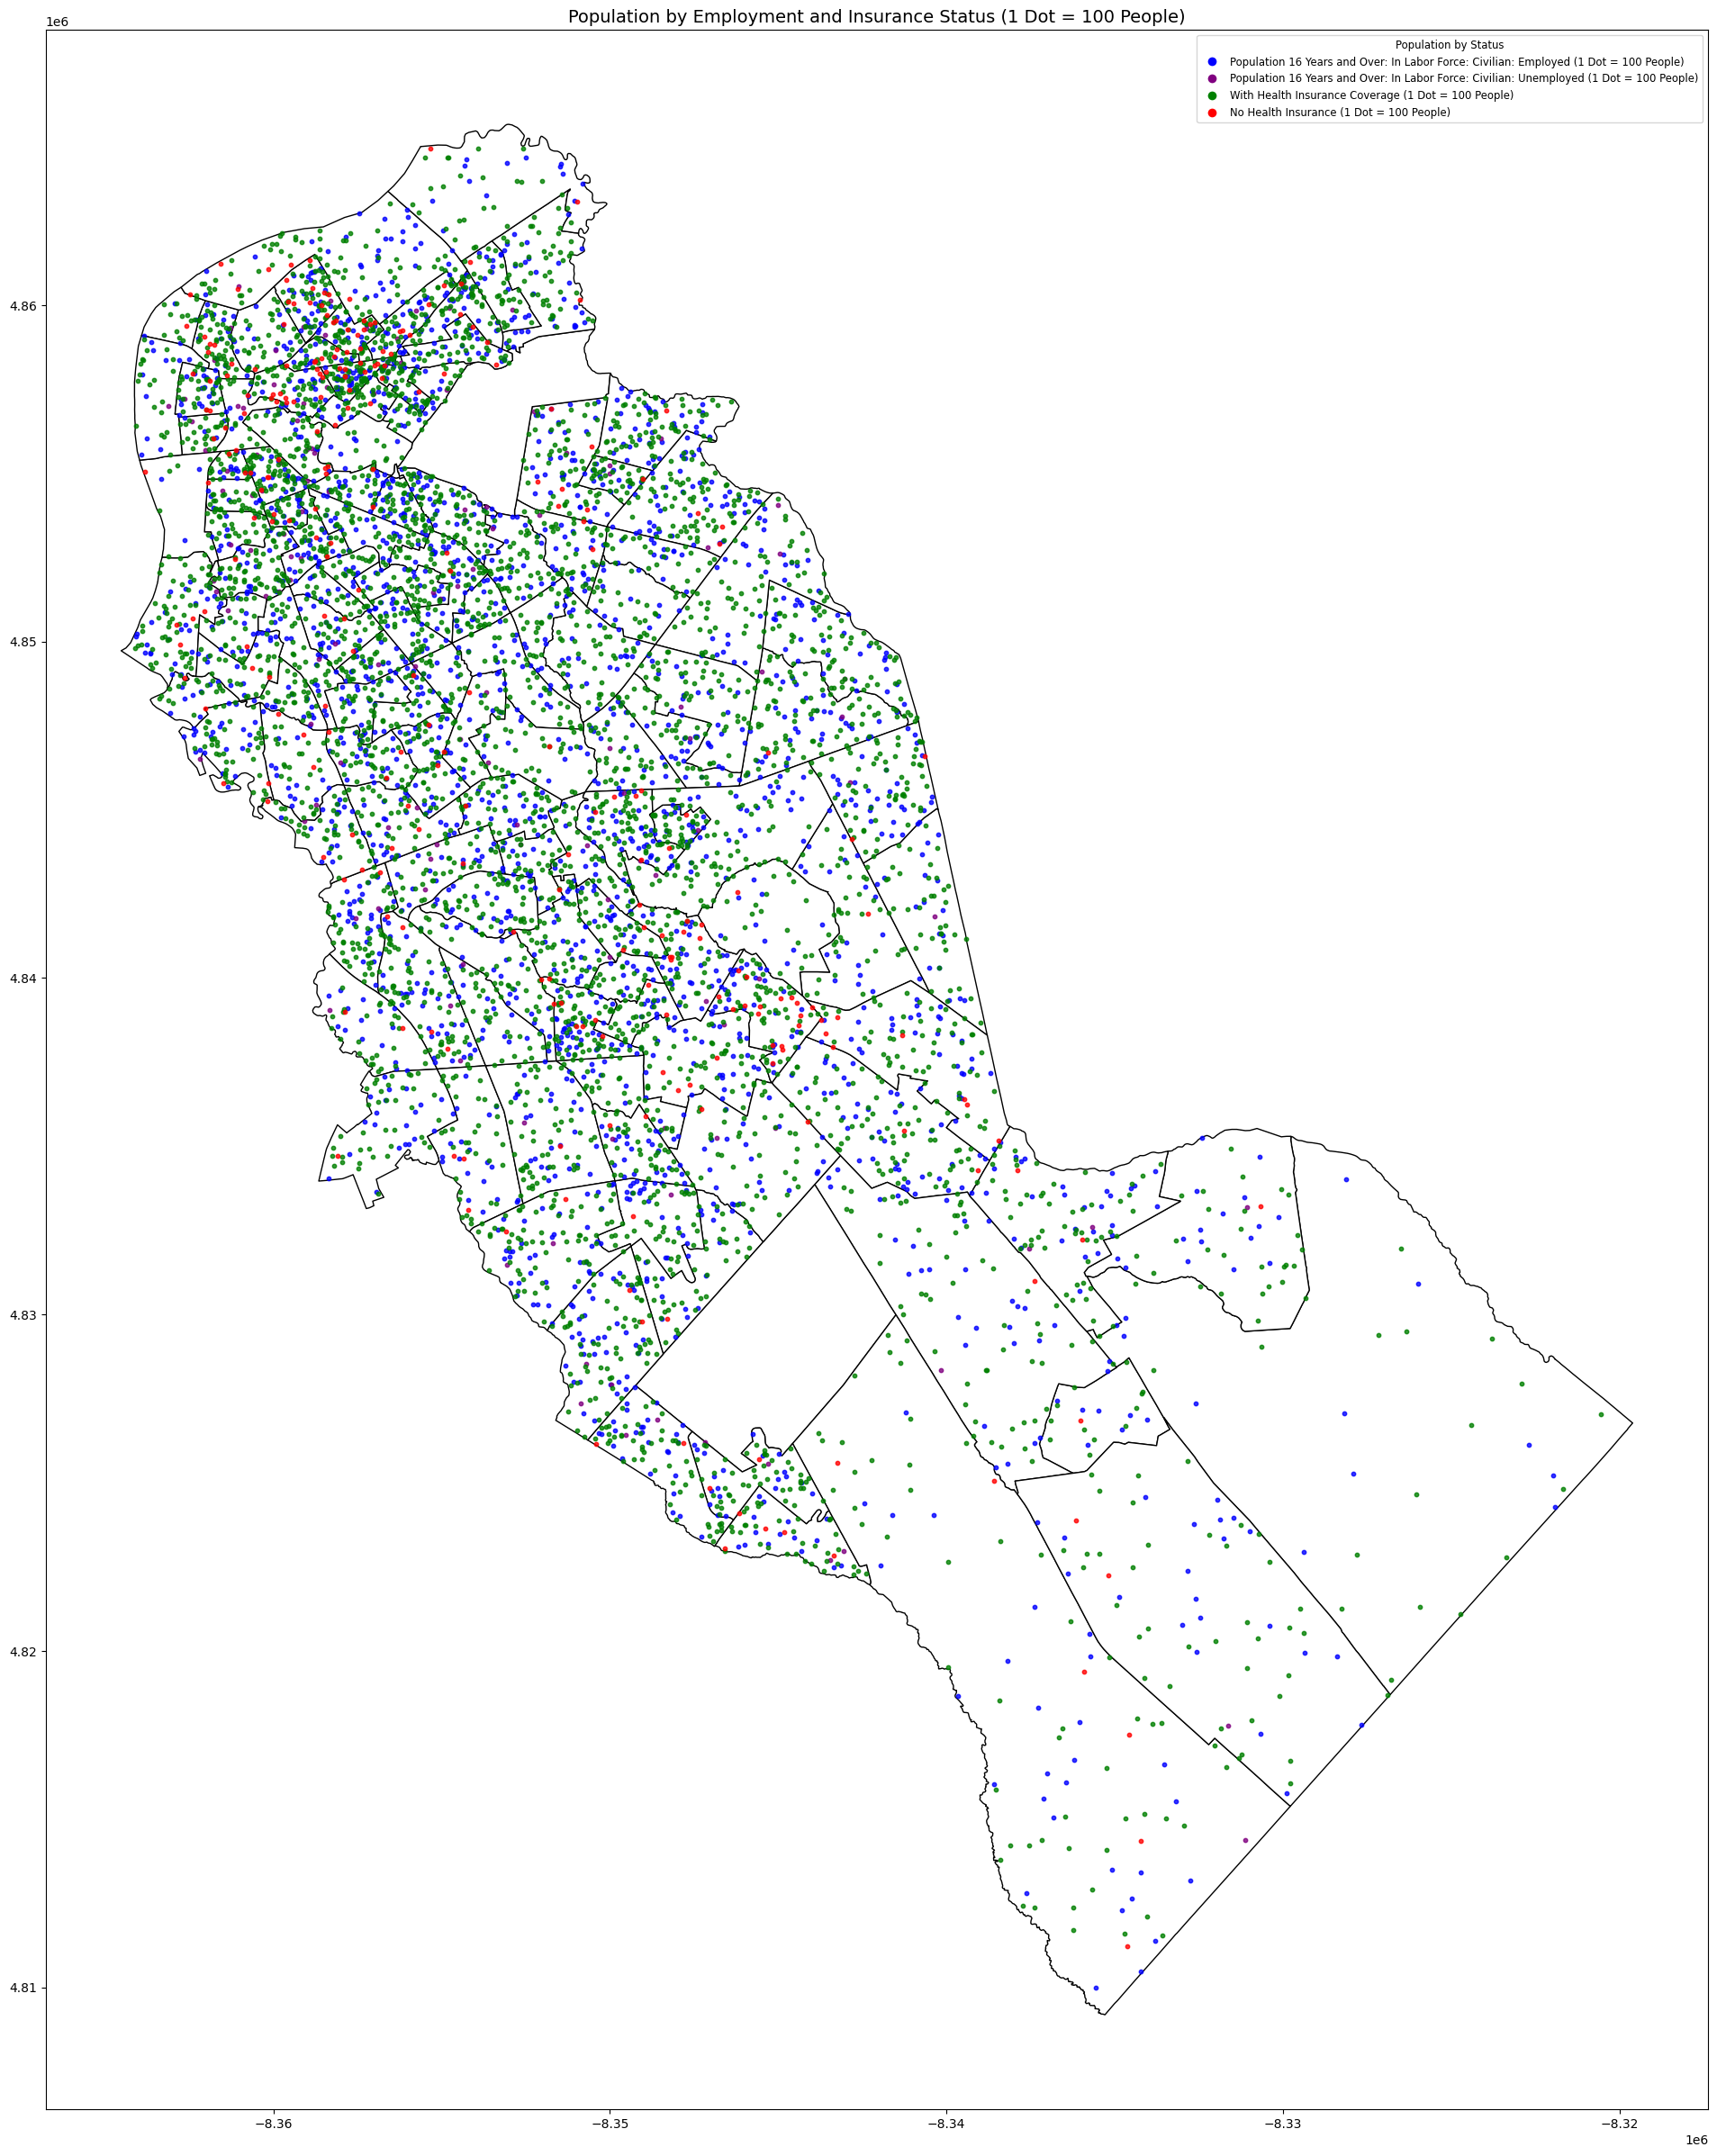

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd

# Define your data mappings
people_status_colors = {
    'Population 16 Years and Over: In Labor Force: Civilian: Employed': 'blue',
    'Population 16 Years and Over: In Labor Force: Civilian: Unemployed': 'purple',
    'With Health Insurance Coverage': 'green',
    'No Health Insurance': 'red',
}
people_status_columns = {
    'Population 16 Years and Over: In Labor Force: Civilian: Employed': 'Employed_16Plus',
    'Population 16 Years and Over: In Labor Force: Civilian: Unemployed': 'Unemployed_16Plus',
    'With Health Insurance Coverage': 'Total_With_Health_Ins',
    'No Health Insurance': 'Total_No_Health_Ins'
}

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(40, 30))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')

# Set plot title
plt.title('Population by Employment and Insurance Status (1 Dot = 100 People)', fontsize=14)
plt.show();


The key takeaways from the dot density map showing population distribution by employment and insurance status in Camden are as follows ( this map underscores the close link between employment, healthcare access, and quality of life in Camden):


***Correlation Between Employment and Health Insurance Coverage***

•	**Employed and Insured Population Clusters:** There are clear clusters where employed individuals (represented by green dots) also have health insurance coverage (also green dots), suggesting that employment is a significant factor in securing health insurance.

•	In my opinion areas with higher employment tend to have better healthcare access.

•**	Unemployed and Uninsured Population:** Conversely, there is a visible overlap in areas with higher unemployment (blue dots) and individuals without health insurance (red dots), indicating that unemployment is associated with a lack of healthcare coverage.

•	 This suggests that joblessness in Camden likely leads to reduced healthcare access.
Neighborhood Disparities

•	**Northern Camden**: This area shows higher concentrations of employed and insured individuals, suggesting relatively better economic conditions and healthcare access. Quality of life in these neighborhoods may be comparatively higher.

•	**Other Parts of Camden:** Certain neighborhoods  e.g, south Camden show significant clusters of unemployed and uninsured individuals, highlighting areas where residents face greater economic and healthcare challenges.

*Economic and Healthcare Vulnerability *
•	Widespread Insurance Gaps: The map shows a substantial number of red dots across various neighborhoods, indicating that healthcare access is a widespread challenge in Camden.

•	This insurance gap likely contributes to poorer health outcomes and lower quality of life in affected areas.

•	**Pockets of Economic Hardship:** Areas with higher concentrations of unemployed (blue dots) and uninsured individuals are indicators of economic vulnerability.

•	 These areas likely face compounded issues, such as lower household income, limited access to services, and overall lower quality of life.

***Implications for Quality of Life***

•	Economic Stability as a Driver of Quality of Life: The correlation between employment and insurance coverage highlights the importance of stable jobs in enhancing quality of life.

•	Employment not only improves income but also appears to play a key role in ensuring healthcare access.

•	**Target Areas for Policy Intervention:** Certain neighborhoods with high unemployment and uninsured rates could be prioritized for economic development programs, job training, and healthcare access initiatives to improve the overall quality of life for residents in these areas.



ANOTHER DENSITY MAP

Given the variables chosen:


+Bachelors_25Plus:Population 25 Years and Over: Bachelors Degree

+Less_HS_25Plus: Population 25 Years and Over without High School

+Housholds_Retire_Inc:Households: With Retirement Income

+Pop_65Plus_No_Health_Ins:Population 65 or Older: No Health Insurance Coverage

<ipython-input-261-1f92ce5d1776>:45: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8


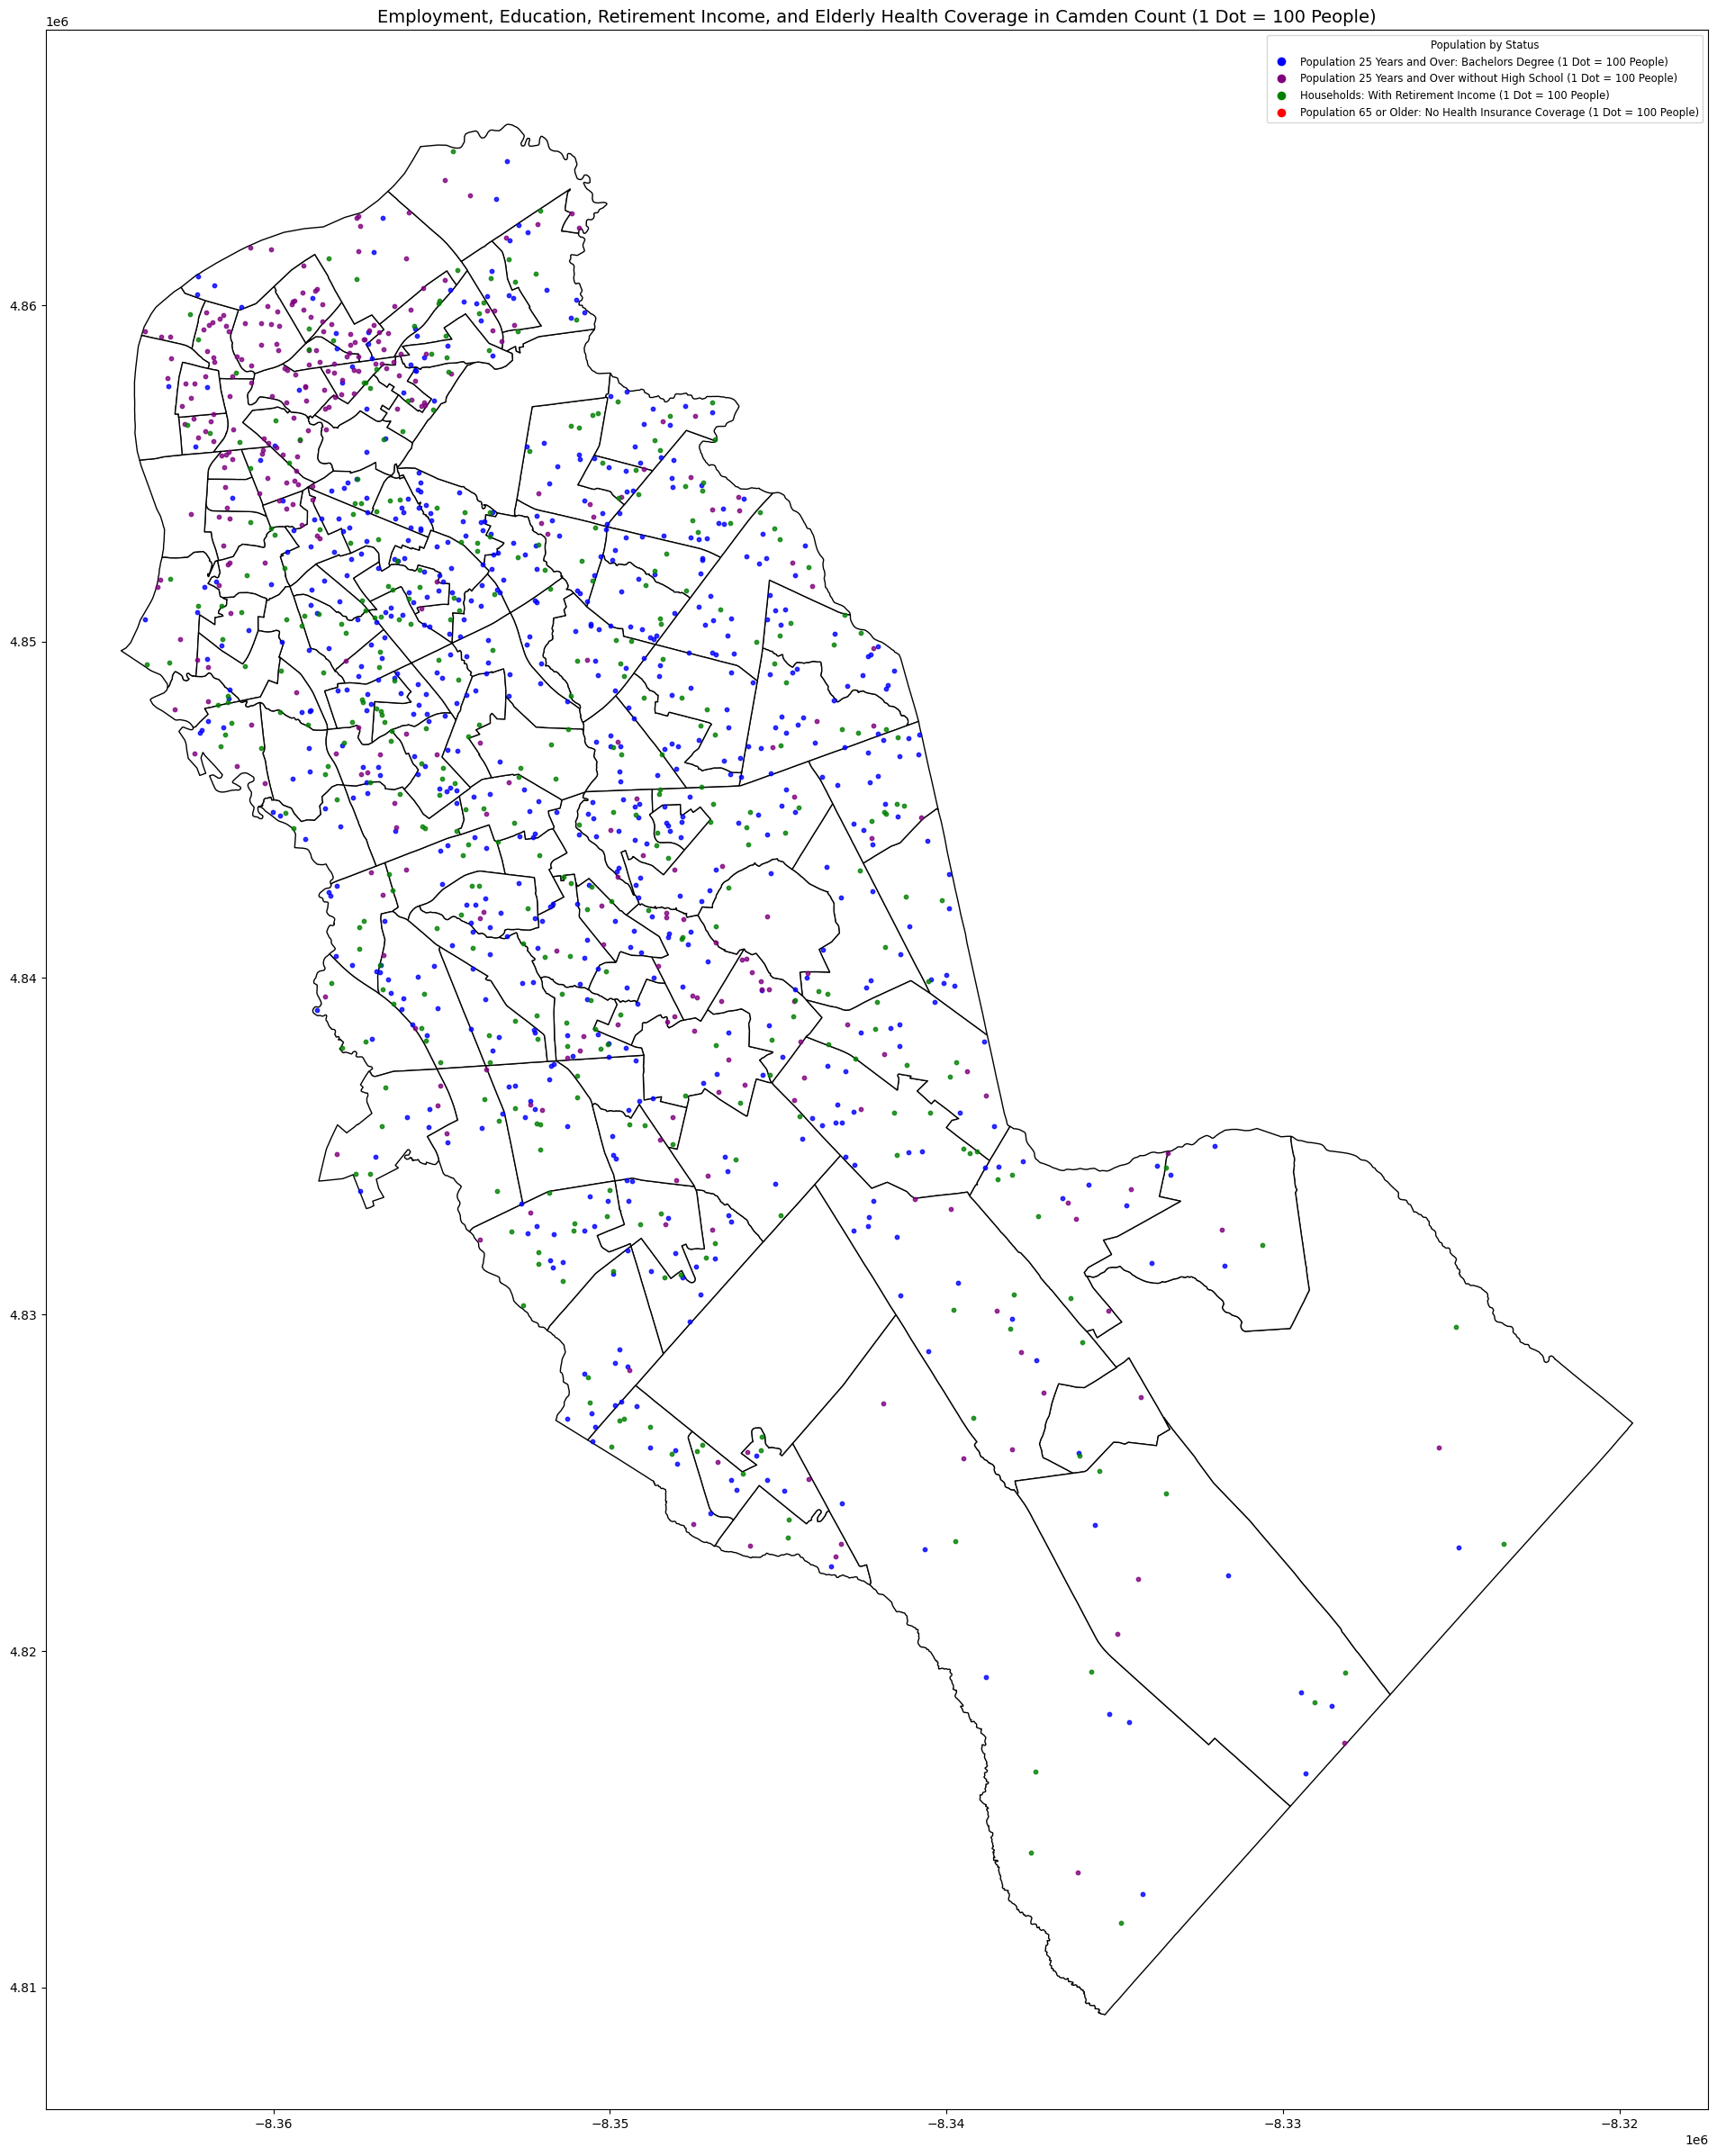

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd

# Define your data mappings
people_status_colors = {
    'Population 25 Years and Over: Bachelors Degree': 'blue',
    'Population 25 Years and Over without High School': 'purple',
    'Households: With Retirement Income': 'green',
    'Population 65 or Older: No Health Insurance Coverage': 'red',
}
people_status_columns = {
    'Population 25 Years and Over: Bachelors Degree': 'Bachelors_25Plus',
    'Population 25 Years and Over without High School': 'Less_HS_25Plus',
    'Households: With Retirement Income': 'Housholds_Retire_Inc',
    'Population 65 or Older: No Health Insurance Coverage': 'Pop_65Plus_No_Health_Ins'
}
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(40, 30))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')

# Set plot title
plt.title('Employment, Education, Retirement Income, and Elderly Health Coverage in Camden Count (1 Dot = 100 People)', fontsize=14)
plt.show();


<Axes: >

<Axes: >

<Axes: >

<Axes: >

<ipython-input-262-451c1ab0b913>:45: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)


<Axes: >

Text(0.5, 1.0, 'Employment, Education, Retirement Income, and Elderly Health Coverage in Camden County (1 Dot = 100 People)')

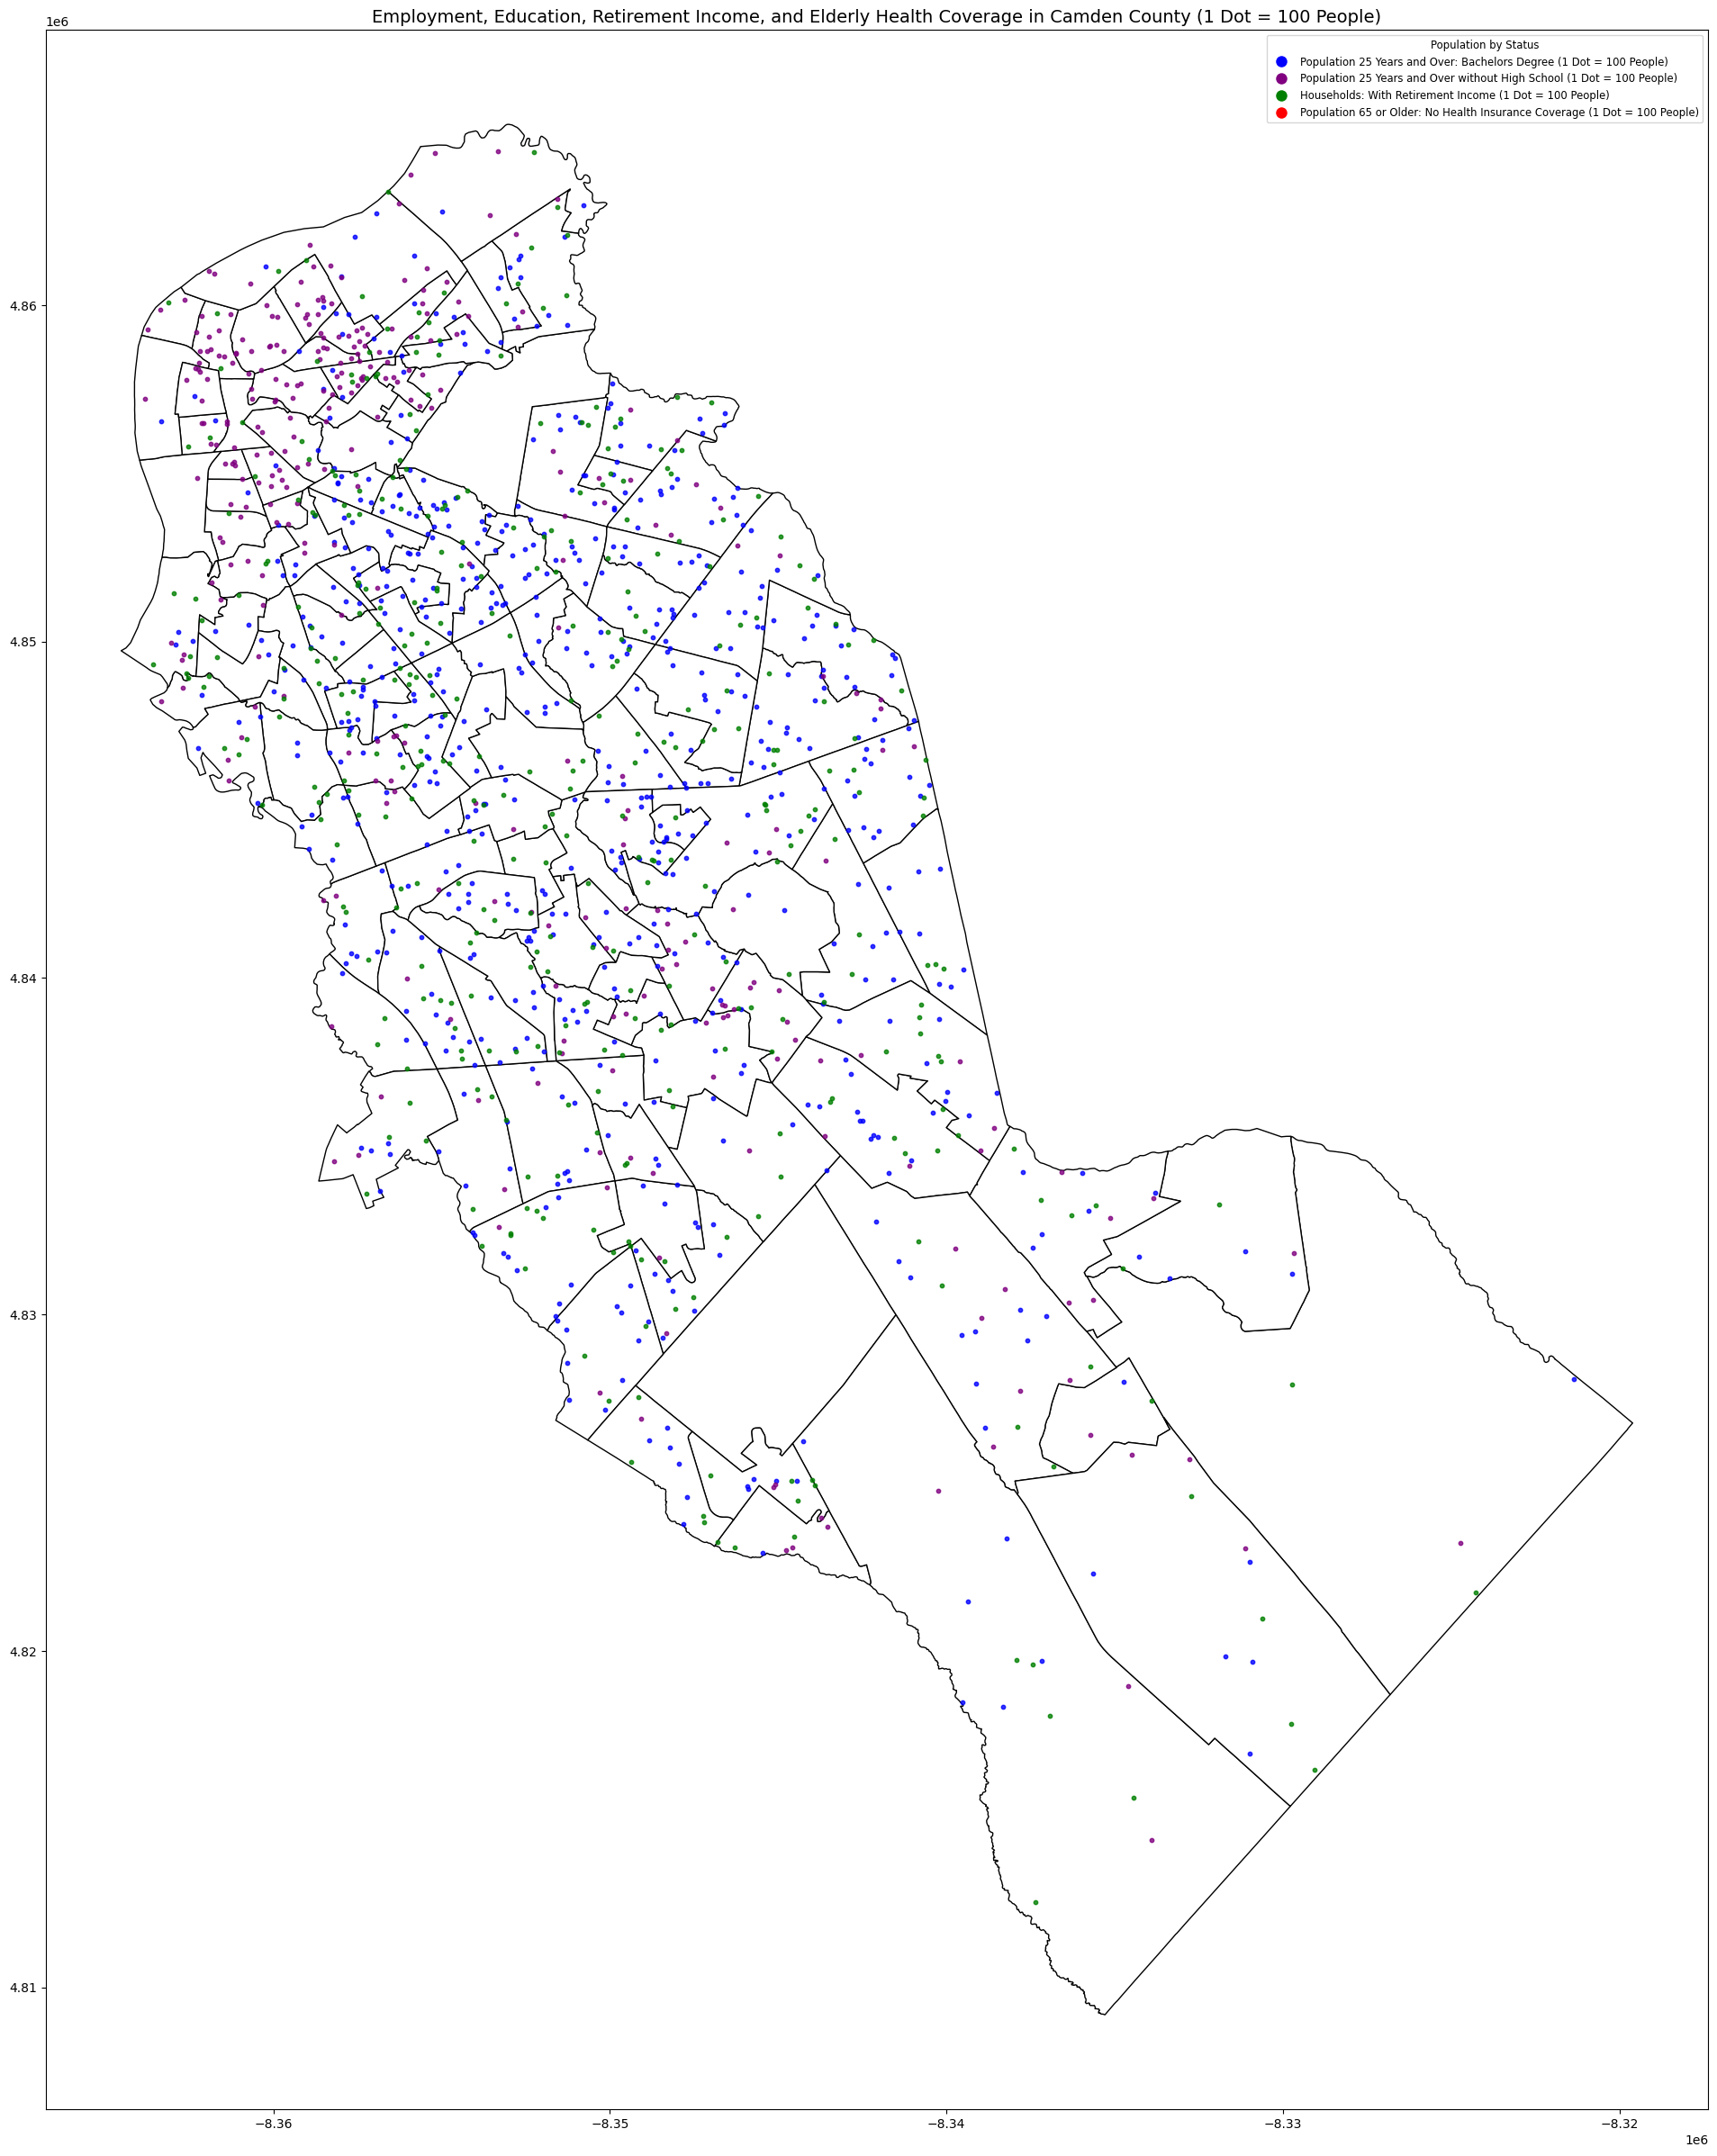

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point

# Define your data mappings
people_status_colors = {
    'Population 25 Years and Over: Bachelors Degree': 'blue',
    'Population 25 Years and Over without High School': 'purple',
    'Households: With Retirement Income': 'green',
    'Population 65 or Older: No Health Insurance Coverage': 'red',
}
people_status_columns = {
    'Population 25 Years and Over: Bachelors Degree': 'Bachelors_25Plus',
    'Population 25 Years and Over without High School': 'Less_HS_25Plus',
    'Households: With Retirement Income': 'Housholds_Retire_Inc',
    'Population 65 or Older: No Health Insurance Coverage': 'Pop_65Plus_No_Health_Ins'
}

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(40, 30))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')

# Set plot title
plt.title('Employment, Education, Retirement Income, and Elderly Health Coverage in Camden County (1 Dot = 100 People)', fontsize=14)
plt.show()

**Overall Observation**

•	North Camden appears to face the greatest challenges in education, economic stability, and healthcare access for the elderly, suggesting a need for focused interventions in these areas.


•	South Camden has mixed needs, with some areas requiring educational and healthcare support.


•	East Camden generally shows higher economic stability and better healthcare access for seniors but may still benefit from targeted educational support in certain neighborhoods.



CONCLUSION

Observations on Socioeconomic Conditions

Economic and Health Disparities:
•	Camden County shows significant socioeconomic and health disparities across neighborhoods, with clear differences in income, employment, education, and healthcare access.

•	Higher-income areas display better quality of life indicators, including greater employment, educational attainment, and health insurance coverage.


 Challenges in Lower-Income Neighborhoods:
•	Lower-income neighborhoods face economic vulnerability, with higher reliance on public assistance and lower educational attainment.


•	These areas often have lower rates of health insurance, especially among elderly residents, pointing to gaps in healthcare access for vulnerable populations.


Key Relationships:

•	A strong association is observed between socioeconomic factors such as income, education, and employment and health outcomes.
•	Higher education and stable employment correlate with increased health insurance coverage and overall economic stability.

Implications for Policy:
•	Targeted programs in economically disadvantaged areas—such as job creation, educational support, and healthcare access initiatives—are crucial for reducing inequalities.



FUTURE FOCUS

More comparision of the socio-economic dtereminants of quality of life and health outcome in camden county to further understand the trends using other indicators.



Data source

Employment Status for Total Population 16 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A17002.


Employment Status for Male Population 16 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A17002A.


Employment Status for Female Population 16 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A17002B.

Highest Educational Attainment for Population 25 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A12002.


Average Family Income (In 2022 Inflation Adjusted Dollars) (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A14011.

Households with Public Assistance Income (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A10014.

Households with Retirement Income (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A10015.

Ratio of Income to Poverty Level of Families in the Past 12 Months (Summarized - top-coded at 5.00) (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=D13004.


Health Insurance (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A20001.


Health Insurance by Age (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A20002.


Reference

Jargowsky, P. A. (2005). The ecological fallacy. Encyclopedia of social measurement, 1, 715-722.


Robinson, W. S. (1950). Ecological correlations and the behavior of individuals. American Sociological Review, 15(3), 351–357. https://doi.org/10.2307/2087176

Robinson, W. S. (1950). Ecological correlations and the behavior of individuals. American Sociological Review, 15(3), 351-357.